# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                # Load pickled data
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './Data_Pickle_Files/train.p'
validation_file= './Data_Pickle_Files/valid.p'
testing_file = './Data_Pickle_Files/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
#X_train_crop = croppedTrain['train_dataset_crop']

In [3]:
# X_train_crop contains dataset with autocropping for all circular traffic signs.

# Following pickle file contains output of autocrop2.py
cropped_training_file = './Data_Pickle_Files/croppedUnprocessedTrain_circle2.p'

with open(cropped_training_file, mode ='rb') as f:
    croppedTrain = pickle.load(f)
X_train_crop = croppedTrain['train_dataset_crop']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [12]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = np.shape(X_train)[0]
#print(n_train)
# TODO: Number of validation examples
n_validation = np.shape(X_valid)[0]

# TODO: Number of testing examples.
n_test = np.shape(X_test)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train)[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of training examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of training examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

One unique example of each traffic sign in the training set


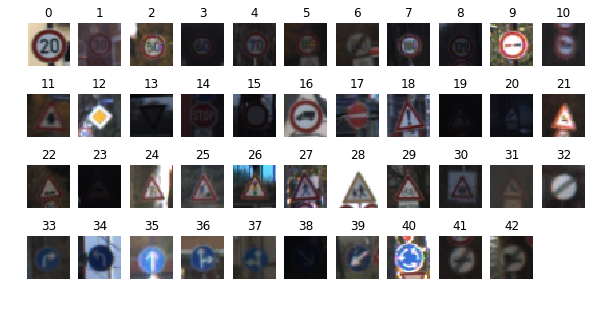

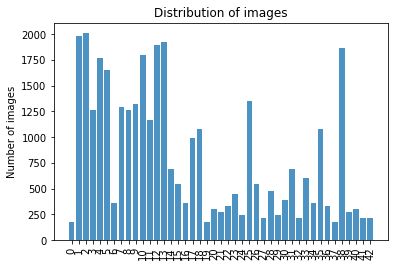

In [13]:
import matplotlib.pyplot as plt

### First visualize one sample of all the different traffic signs from the test set
unique, unique_id = np.unique(y_train,return_index = True)
document = True
print("One unique example of each traffic sign in the training set")
# Chosing 4x11 image array to visualize all the 43 signs in one image
fig, ax = plt.subplots(4,11,figsize = (10,5))
j=0
num_images =[]
for i in range(len(unique_id)):
    image = X_train[unique_id[i],:,:,:]
    ax[int(i/11)][i%11].imshow(image)
    ax[int(i/11)][i%11].set_title(str(i))
    ax[int(i/11)][i%11].axis('off')  # clear x- and y-axes
    num_images.append(len(y_train[y_train == unique[j]]))
    j += 1
num_images
# Manually setting axis 44 to off, will have to change if more traffic signs are added to the list
ax[3][10].axis('off')
#print(num_images)
if document:
    outputname = "./results/data_exploration/visualize_all_signs.png"
    plt.savefig(outputname, bbox_inches='tight', dpi=100)
plt.show()

### Second visualize distribution of the various traffic signs in the training set
#fig1, ax1 = plt.subplots(111)
plt.bar(unique, num_images, align='center', alpha = 0.8)
plt.xticks(unique, rotation = 'vertical')
plt.ylabel('Number of images')
if document:
    outputname = "./results/data_exploration/training_set_distribution.png"
    plt.savefig(outputname, bbox_inches='tight', dpi=100)
    plt.title("Distribution of images")
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [14]:
import cv2
import matplotlib.image as mpimg
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Maybe there is a benefit to keep all 3 color channels for step 1 of the convolution, so we leave it as 3 channel input for now and avoid grayscale
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def normalize_range(x):
    x_max = np.max(x)
    x_min = np.min(x)
    output_min = 0.01
    output_max = 0.99
    x = output_min + (x - x_min)*(output_max-output_min)/(x_max - x_min)
    return x

idx = 0# global variable to generate unique filenames when we run 
# Data normalization attempt 1 - Data standardization
def preprocess_data(X, n):    
    n_train = np.shape(X)[0]
    X_norm =[]
    X_gray_norm =[]
    document = True
    #fig, ax = plt.subplots(2,1)
    for i in range (n):
        image_r = (X[i,:,:,0]-np.mean(X[i,:,:,0]))/np.var(X[i,:,:,0])
        image_r_norm = normalize_range(image_r)
        
        image_g = (X[i,:,:,1]-np.mean(X[i,:,:,1]))/np.var(X[i,:,:,1])
        image_g_norm = normalize_range(image_g)
        
        image_b = (X[i,:,:,2]-np.mean(X[i,:,:,2]))/np.var(X[i,:,:,2])
        image_b_norm = normalize_range(image_b)
        
        image_gy = ((0.299 * (X[i,:,:,2]) + 0.587 * (X[i,:,:,1]) + 0.114 * (X[i,:,:,0]))/3).astype(np.uint8)
        #ax[0].imshow(image_gy,cmap = 'Greys_r')
        #print(np.shape(image_gy))
        clahe = cv2.createCLAHE(clipLimit = 25.0,tileGridSize = (4,4))
        image_gray = clahe.apply(image_gy)
        #print(image_gray)
        
        #ax[1].imshow(image_gray,cmap='Greys_r')
  
        image_norm = np.transpose([image_r_norm,image_g_norm,image_b_norm],(1,2,0))
        
        image_gray_norm = normalize_range(image_gray)
        
        X_norm.append(image_norm)
        X_gray_norm.append(image_gray_norm)
        
        if document:
            global idx
            if i == 200:
                fig, ax = plt.subplots(2,2)

                ax[0][0].imshow(X[i,:,:,:])
                ax[0][0].set_title("Example image")
                ax[0][0].axis('off')
                
                ax[0][1].imshow(image_gy,cmap='Greys_r')
                ax[0][1].set_title("Y channel of YCrCb")
                ax[0][1].axis('off')
                
                ax[1][0].imshow(image_gray,cmap='Greys_r')
                ax[1][0].set_title("Histogram equalization")
                ax[1][0].axis('off')
                
                ax[1][1].imshow(image_gray_norm,cmap='Greys_r')
                ax[1][1].set_title("Normalized image")
                ax[1][1].axis('off')
                
                outputname = "./results/data_preprocessing/preprocessing_pipeline"+str(idx)+".png"
                plt.savefig(outputname, bbox_inches='tight', dpi=100)
                idx += 1
                plt.show()
    
    return X_norm,X_gray_norm#np.reshape(X_gray_norm,newshape = (n_train,32,32,1))

### Same preprocessing but for input as list of images instead of array
## This is not necessary, but I did not fully understand concatenate at the initial stages
### TODO: Update code to convert code to array if it is a list before processing with common function
### It will also help reduce the size of the pickle data files for saving the processed results

def preprocess_data_list(X, n):    
    n_train = np.shape(X)[0]
    X_norm =[]
    X_gray_norm =[]
    document = True
    #fig, ax = plt.subplots(2,1)
    for i in range (n):
        image_r = (X[i][:,:,0]-np.mean(X[i][:,:,0]))/np.var(X[i][ :,:,0])
        image_r_norm = normalize_range(image_r)
        
        image_g = (X[i][:,:,1]-np.mean(X[i][:,:,1]))/np.var(X[i][:,:,1])
        image_g_norm = normalize_range(image_g)
        
        image_b = (X[i][:,:,2]-np.mean(X[i][:,:,2]))/np.var(X[i][:,:,2])
        image_b_norm = normalize_range(image_b)
        
        image_gy = ((0.299 * (X[i][:,:,0]) + 0.587 * (X[i][:,:,1]) + 0.114 * (X[i][:,:,2]))/3).astype(np.uint8)
        #ax[0].imshow(image_gy,cmap = 'Greys_r')
        #print(np.shape(image_gy))
        clahe = cv2.createCLAHE(clipLimit = 25.0,tileGridSize = (4,4))
        image_gray = clahe.apply(image_gy)
        #image_gray = cv2.equalizeHist(image_gy)
        #print(image_gray)
        
        #ax[1].imshow(image_gray,cmap='Greys_r')
  
        image_norm = np.transpose([image_r_norm,image_g_norm,image_b_norm],(1,2,0))
        
        image_gray_norm = normalize_range(image_gray)
        
        X_norm.append(image_norm)
        X_gray_norm.append(image_gray_norm)
        #plt.show()
        if document == True:
            global idx
            if i == 2000:
                fig, ax = plt.subplots(2,2)

                ax[0][0].imshow(X[i])
                ax[0][0].set_title("Example image")
                ax[0][0].axis('off')
                
                ax[0][1].imshow(image_gy,cmap='Greys_r')
                ax[0][1].set_title("Y channel of YCrCb")
                ax[0][1].axis('off')
                
                ax[1][0].imshow(image_gray,cmap='Greys_r')
                ax[1][0].set_title("Histogram equalization")
                ax[1][0].axis('off')
                
                ax[1][1].imshow(image_gray_norm,cmap='Greys_r')
                ax[1][1].set_title("Normalized image")
                ax[1][1].axis('off')
                
                outputname = "./results/data_preprocessing/preprocessing_pipeline"+str(idx)+".png"
                plt.savefig(outputname, bbox_inches='tight', dpi=100)
                idx += 1
                plt.show()
    
    return X_norm,X_gray_norm#np.reshape(X_gray_norm,newshape = (n_train,32,32,1))



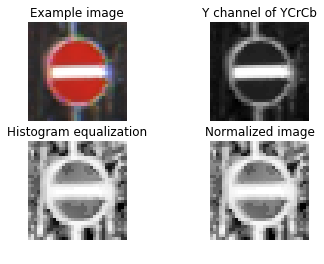

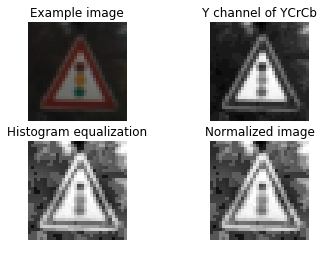

Operation complete


In [15]:
X_test_norm, X_test_gray = preprocess_data(X_test, n_test)
X_valid_norm, X_valid_gray = preprocess_data(X_valid, n_validation)
print('Operation complete')

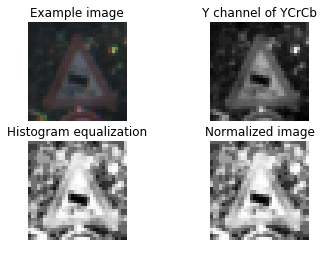

Operation complete


In [16]:
X_train_norm,X_train_gray = preprocess_data_list(X_train_crop, n_train)
print('Operation complete')

(32, 32)
Min value in normalized image = 0.99
Min value in normalized image = 0.01
Preprocessing pipeline visualizations

One unique example of each traffic sign in the validation set


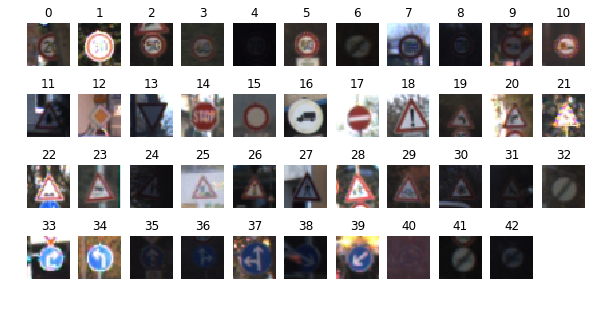

Output after RGB normalization


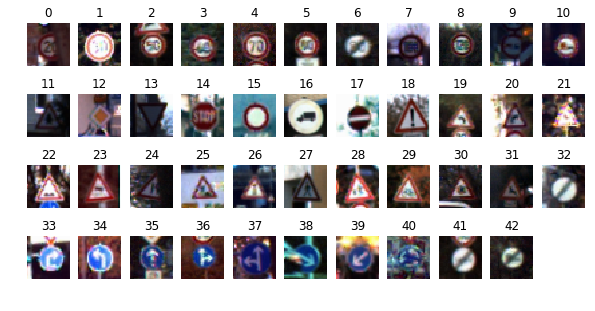

Histogram equalized Y channel image


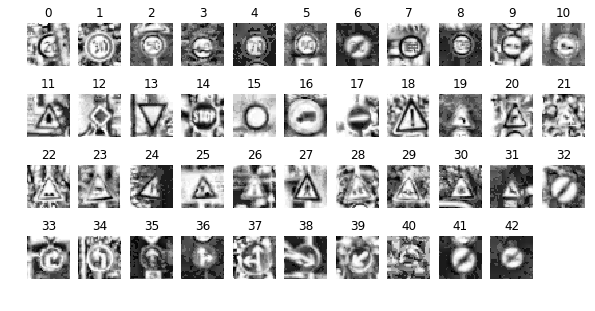

In [18]:
#Verify performance of normalization
print(np.shape(X_train_gray[0]))


# Check range
print("Min value in normalized image = "+str(np.max(X_train_norm)))
print("Min value in normalized image = "+str(np.min(X_train_norm)))

print("Preprocessing pipeline visualizations")
print("")
print("One unique example of each traffic sign in the validation set")
# Attempt to visualize output of normalization
unique, unique_id = np.unique(y_valid,return_index = True)
fig, ax = plt.subplots(4,11,figsize = (10,5))
for i in range(len(unique_id)):
    image = X_valid[unique_id[i],:,:,:]
    ax[int(i/11)][i%11].imshow(image)
    ax[int(i/11)][i%11].axis('off')  # clear x- and y-axes
    ax[int(i/11)][i%11].set_title(str(i))
ax[4-1][11-1].axis('off')
plt.show()
print("Output after RGB normalization")
fig, ax = plt.subplots(4,11,figsize = (10,5))
for i in range(len(unique_id)):
    image = X_valid_norm[unique_id[i]]
    ax[int(i/11)][i%11].imshow(image,cmap = 'Greys_r')
    ax[int(i/11)][i%11].axis('off')  # clear x- and y-axes
    ax[int(i/11)][i%11].set_title(str(i))
ax[4-1][11-1].axis('off')
plt.show()
print("Histogram equalized Y channel image")
fig, ax = plt.subplots(4,11,figsize = (10,5))
for i in range(len(unique_id)):
    image = X_valid_gray[unique_id[i]]
    ax[int(i/11)][i%11].imshow(np.resize(image,(32,32)),cmap = 'Greys_r')
    ax[int(i/11)][i%11].axis('off')  # clear x- and y-axes
    ax[int(i/11)][i%11].set_title(str(i))
ax[4-1][11-1].axis('off')
plt.show()


In [19]:
## merge r,g,b and grayscale image for single input to training net
#X_train_full = np.concatenate((X_train_norm,np.asarray(X_train_gray)[:,:,:,None] ), axis = 3)
print(np.shape(np.asarray(X_valid_gray)[:,:,:,None]))
X_valid_full = np.concatenate((X_valid_norm,np.asarray(X_valid_gray)[:,:,:,None] ), axis = 3)
X_test_full = np.concatenate((X_test_norm,np.asarray(X_test_gray)[:,:,:,None] ), axis = 3)

X_train_gray = np.asarray(X_train_gray)[:,:,:,None]
X_test_gray = np.asarray(X_test_gray)[:,:,:,None]
X_valid_gray = np.asarray(X_valid_gray)[:,:,:,None]

(4410, 32, 32, 1)


In [202]:
import os

#save all the preprocessed data to a pickle file
pickle_file = './Data_Pickle_Files/preprocessedGTSDB_cropped_circle.p'
#if not os.path.isfile(pickle_file):
try:
    with open('./Data_Pickle_Files/preprocessedGTSDB_cropped_circle.p', 'wb') as pfile:
        print('Saving data to pickle file...')
        pickle.dump(
            {
                'train_dataset_full': X_train_full,
                'train_labels': y_train,
                    
                'valid_dataset_full': X_valid_full,
                'valid_labels': y_valid,
                    
                'test_dataset_full': X_test_full,
                'test_labels': y_test,
            },
            pfile, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise
"""
try:
    with open('./Data_Pickle_Files/preprocessedGTSDB_cropped_circle.p', 'wb') as pfile:
        print('Saving data to pickle file...')
        pickle.dump(
            {
                'train_dataset_full': X_train_full,
                'train_labels': y_train,
                'train_dataset_rgb': X_train_norm,
                'train_dataset_gray': X_train_gray,
                    
                'valid_dataset_full': X_valid_full,
                'valid_labels': y_valid,
                'valid_dataset_rgb': X_valid_norm,
                'valid_dataset_gray': X_valid_gray,
                    
                'test_dataset_full': X_test_full,
                'test_labels': y_test,
                'test_dataset_rgb': X_test_norm,
                'test_dataset_gray': X_test_gray,
            },
            pfile, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise
"""
print('Data cached in pickle file.')

Saving data to pickle file...
Data cached in pickle file.


In [20]:
### Benchmark point to load already preprocessed data and run CNNs

# repeating imports to avoid need to run previous blocks again
import pickle
import os
import cv2
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle




In [21]:
### Load preprocessed data from pickle file
preprocessed_data_file = './Data_Pickle_Files/preprocessedGTSDB_cropped_circle.p'

with open(preprocessed_data_file, mode='rb') as f:
    data = pickle.load(f)
    
X_train_full, y_train = data['train_dataset_full'], data['train_labels']
X_test_full, y_test = data['test_dataset_full'], data['test_labels']
X_valid_full, y_valid = data['valid_dataset_full'], data['valid_labels']

In [22]:
n_classes = len(np.unique(y_train))

### Model Architecture

In [ ]:
"""

This section was originally used to experiment with different modifications to the basic LeNet 
Convolutional Neural Net architecture

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    with tf.variable_scope("lenet",reuse = True):
        strides_l1 = [1,1,1,1]
        padding_l1 = 'VALID'
        filter_l1 = tf.get_variable('filter_l1', initializer = tf.truncated_normal([5,5,4,24], mean = mu, stddev = sigma))
        biases_l1 = tf.get_variable('biases_l1', initializer = tf.truncated_normal([24], mean = mu, stddev = sigma))
    
        strides_l2 = [1,1,1,1]
        filter_l2 = tf.get_variable('filter_l2', initializer = tf.truncated_normal([5,5,24,36], mean = mu, stddev = sigma))
        padding_l2 = padding_l1
        biases_l2 = tf.get_variable('biases_l2', initializer = tf.truncated_normal([36], mean = mu, stddev = sigma))
    
        w_linear1 = tf.get_variable('w_linear1', initializer = tf.truncated_normal([900,360], mean = mu, stddev = sigma))
        b_linear1 = tf.get_variable('b_linear1', initializer = tf.truncated_normal([360], mean = mu, stddev = sigma))
    
        w_linear2 = tf.get_variable('w_linear2', initializer = tf.truncated_normal([360,180], mean = mu, stddev = sigma))
        b_linear2 = tf.get_variable('b_linear2', initializer = tf.truncated_normal([180], mean = mu, stddev = sigma))
    
        w_linear3 = tf.get_variable('w_linear3', initializer = tf.truncated_normal([180,43], mean = mu, stddev = sigma))
        b_linear3 = tf.get_variable('b_linear3', initializer = tf.truncated_normal([43], mean = mu, stddev = sigma))
    
    conv_l1 = tf.add(tf.nn.conv2d(x, filter_l1, strides_l1, padding_l1), biases_l1)
    act_l1 = activate(conv_l1)
    
    pool_l1 = tf.nn.max_pool(act_l1,[1,2,2,1],[1,2,2,1],'VALID')
    conv_l2 = tf.add(tf.nn.conv2d(pool_l1,filter_l2,strides_l2, padding_l2), biases_l2)
    
    act_l2 = activate(conv_l2)
    pool_l2 = tf.nn.max_pool(act_l2, [1,2,2,1],[1,2,2,1],'VALID')
    
    
    flattened = flatten(pool_l2)
    
    linear_1 = tf.add(tf.matmul(flattened, w_linear1),b_linear1)
    act_linear1 = activate(linear_1)
    linear_2 = tf.add(tf.matmul(act_linear1, w_linear2),b_linear2)
    act_linear2 = activate(linear_2)
    logits = tf.add(tf.matmul(act_linear2, w_linear3), b_linear3)
    
    return logits



def LeNet_gray(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    strides_l1 = [1,1,1,1]
    padding_l1 = 'VALID'
    filter_l1 = tf.Variable(tf.truncated_normal([5,5,1,24], mean = mu, stddev = sigma))
    biases_l1 = tf.Variable(tf.truncated_normal([24], mean = mu, stddev = sigma))
    
    strides_l2 = [1,1,1,1]
    filter_l2 = tf.Variable(tf.truncated_normal([5,5,24,36], mean = mu, stddev = sigma))
    padding_l2 = padding_l1
    biases_l2 = tf.Variable(tf.truncated_normal([36], mean = mu, stddev = sigma))
    
    w_linear1 = tf.Variable(tf.truncated_normal([900,360], mean = mu, stddev = sigma))
    b_linear1 = tf.Variable(tf.truncated_normal([360], mean = mu, stddev = sigma))
    
    w_linear2 = tf.Variable(tf.truncated_normal([360,180], mean = mu, stddev = sigma))
    b_linear2 = tf.Variable(tf.truncated_normal([180], mean = mu, stddev = sigma))
    
    w_linear3 = tf.Variable(tf.truncated_normal([180,43], mean = mu, stddev = sigma))
    b_linear3 = tf.Variable(tf.truncated_normal([43], mean = mu, stddev = sigma))
    
    conv_l1 = tf.add(tf.nn.conv2d(x, filter_l1, strides_l1, padding_l1), biases_l1)
    act_l1 = activate(conv_l1)
    pool_l1 = tf.nn.max_pool(act_l1,[1,2,2,1],[1,2,2,1],'VALID')
    
    conv_l2 = tf.add(tf.nn.conv2d(pool_l1,filter_l2,strides_l2, padding_l2), biases_l2)
    act_l2 = activate(conv_l2)
    pool_l2 = tf.nn.max_pool(act_l2, [1,2,2,1],[1,2,2,1],'VALID')
    
    flattened = flatten(pool_l2)
    
    linear_1 = tf.add(tf.matmul(flattened, w_linear1),b_linear1)
    act_linear1 = activate(linear_1)
    
    linear_2 = tf.add(tf.matmul(act_linear1, w_linear2),b_linear2)
    act_linear2 = activate(linear_2)
    
    logits = tf.add(tf.matmul(act_linear2, w_linear3), b_linear3)
    
    return logits

def LeNet_Wider(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    strides_l1 = [1,1,1,1]
    padding_l1 = 'VALID'
    filter_l1 = tf.Variable(tf.truncated_normal([5,5,4,40], mean = mu, stddev = sigma))
    biases_l1 = tf.Variable(tf.truncated_normal([40], mean = mu, stddev = sigma))
    
    strides_l2 = [1,1,1,1]
    filter_l2 = tf.Variable(tf.truncated_normal([5,5,40,60], mean = mu, stddev = sigma))
    padding_l2 = padding_l1
    biases_l2 = tf.Variable(tf.truncated_normal([60], mean = mu, stddev = sigma))
    
    w_linear1 = tf.Variable(tf.truncated_normal([1500,500], mean = mu, stddev = sigma))
    b_linear1 = tf.Variable(tf.truncated_normal([500], mean = mu, stddev = sigma))
    
    w_linear2 = tf.Variable(tf.truncated_normal([500,500], mean = mu, stddev = sigma))
    b_linear2 = tf.Variable(tf.truncated_normal([500], mean = mu, stddev = sigma))
    
    w_linear3 = tf.Variable(tf.truncated_normal([500,43], mean = mu, stddev = sigma))
    b_linear3 = tf.Variable(tf.truncated_normal([43], mean = mu, stddev = sigma))
    
    conv_l1 = tf.nn.conv2d(x, filter_l1, strides_l1, padding_l1) + biases_l1
    act_l1 = activate(conv_l1)
    pool_l1 = tf.nn.max_pool(act_l1,[1,2,2,1],[1,2,2,1],'VALID')
    conv_l2 = tf.add(tf.nn.conv2d(pool_l1,filter_l2,strides_l2, padding_l2), biases_l2)
    act_l2 = activate(conv_l2)
    pool_l2 = tf.nn.max_pool(act_l2, [1,2,2,1],[1,2,2,1],'VALID')
    flattened = flatten(pool_l2)
    
    linear_1 = tf.add(tf.matmul(flattened, w_linear1),b_linear1)
    act_linear1 = activate(linear_1)
    linear_2 = tf.add(tf.matmul(act_linear1, w_linear2),b_linear2)
    act_linear2 = activate(linear_2)
    logits = tf.add(tf.matmul(act_linear2, w_linear3), b_linear3)
    return logits

def LeNet_Deeper(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    #with tf.variable_scope("lenet", reuse = False): # (pass to variable_scope if rerunning the section of code again after debug)
    strides_l1 = [1,1,1,1]
    padding_l1 = 'VALID'
    filter_l1 = tf.Variable(tf.truncated_normal([3,3,4,36], mean = mu, stddev = sigma))
    biases_l1 = tf.Variable(tf.truncated_normal([36], mean = mu, stddev = sigma))
    
    strides_l2 = [1,1,1,1]
    filter_l2 = tf.Variable(tf.truncated_normal([3,3,36,64], mean = mu, stddev = sigma))
    padding_l2 = 'VALID'
    biases_l2 = tf.Variable(tf.truncated_normal([64], mean = mu, stddev = sigma))

    strides_l3 = [1,1,1,1]
    filter_l3 = tf.Variable(tf.truncated_normal([5,5,64,64], mean = mu, stddev = sigma))
    padding_l3 = 'VALID'
    biases_l3 = tf.Variable(tf.truncated_normal([64], mean = mu, stddev = sigma))

    w_linear1 = tf.Variable(tf.truncated_normal([1600,400], mean = mu, stddev = sigma))
    b_linear1 = tf.Variable(tf.truncated_normal([400], mean = mu, stddev = sigma))
    
    w_linear2 = tf.Variable(tf.truncated_normal([400,200], mean = mu, stddev = sigma))
    b_linear2 = tf.Variable(tf.truncated_normal([200], mean = mu, stddev = sigma))
    
    w_linear3 = tf.Variable(tf.truncated_normal([200,43], mean = mu, stddev = sigma))
    b_linear3 = tf.Variable(tf.truncated_normal([43], mean = mu, stddev = sigma))
    
    conv_l1 = tf.add(tf.nn.conv2d(x, filter_l1, strides_l1, padding_l1), biases_l1)
    act_l1 = activate(conv_l1)
    print(act_l1.get_shape())
    pool_l1 = tf.nn.avg_pool(act_l1,[1,2,2,1],[1,1,1,1],'SAME')
    print(pool_l1.get_shape())
    conv_l2 = tf.add(tf.nn.conv2d(pool_l1,filter_l2,strides_l2, padding_l2), biases_l2)
    print(conv_l2.get_shape())
    act_l2 = activate(conv_l2)
    pool_l2 = tf.nn.max_pool(act_l2, [1,2,2,1],[1,2,2,1],'VALID')
    print(pool_l2.get_shape())
    
    conv_l3 = tf.add(tf.nn.conv2d(pool_l2,filter_l3,strides_l3, padding_l3), biases_l3)
    act_l3 = activate(conv_l3)
    pool_l3 = tf.nn.max_pool(act_l3,[1,2,2,1],[1,2,2,1],'VALID')
    
    print(pool_l3.get_shape())
    
    flattened = flatten(pool_l3)
    
    print(flattened.get_shape())
    
    linear_1 = tf.add(tf.matmul(flattened, w_linear1),b_linear1)
    act_linear1 = activate(linear_1)
    linear_2 = tf.add(tf.matmul(act_linear1, w_linear2),b_linear2)
    act_linear2 = activate(linear_2)
    
    logits = tf.add(tf.matmul(act_linear2, w_linear3), b_linear3)
    
    return logits
"""

In [24]:
### Neural Net used for traffic sign classifier. Same as Neural Net Deeper but outside of function call to allow plotting of feature maps
## Run this section only once for either redoing the training, or to test performance on new images downloaded from the internet


EPOCHS_INITIAL = 10
EPOCHS_FINAL = 200
BATCH_SIZE = 128
def activate(x):
    return tf.nn.relu(x)
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
num_channels = 4 # to test for single channel grayscale image
x = tf.placeholder(tf.float32, (None, 32, 32, num_channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

mu = 0
sigma = 0.1
#with tf.variable_scope("lenet", reuse = False): # (pass to variable_scope if rerunning the section of code again after debug)
strides_l1 = [1,1,1,1]
padding_l1 = 'VALID'
filter_l1 = tf.Variable(tf.truncated_normal([3,3,4,36], mean = mu, stddev = sigma),name='filt1_l1')
biases_l1 = tf.Variable(tf.truncated_normal([36], mean = mu, stddev = sigma),name='bias1_l1')
    
strides_l2 = [1,1,1,1]
filter_l2 = tf.Variable(tf.truncated_normal([3,3,36,64], mean = mu, stddev = sigma),name='filt2_l2')
padding_l2 = 'VALID'
biases_l2 = tf.Variable(tf.truncated_normal([64], mean = mu, stddev = sigma),name='bias2_l2')

strides_l3 = [1,1,1,1]
filter_l3 = tf.Variable(tf.truncated_normal([5,5,64,64], mean = mu, stddev = sigma),name='filt3_l3')
padding_l3 = 'VALID'
biases_l3 = tf.Variable(tf.truncated_normal([64], mean = mu, stddev = sigma),name='bias3_l3')

w_linear1 = tf.Variable(tf.truncated_normal([1600,400], mean = mu, stddev = sigma),name='lin1_l4')
b_linear1 = tf.Variable(tf.truncated_normal([400], mean = mu, stddev = sigma),name='bias4_l4')

w_linear2 = tf.Variable(tf.truncated_normal([400,200], mean = mu, stddev = sigma),name='lin2_l5')
b_linear2 = tf.Variable(tf.truncated_normal([200], mean = mu, stddev = sigma),name='bias5_l5')
    
w_linear3 = tf.Variable(tf.truncated_normal([200,43], mean = mu, stddev = sigma),name='lin3_l6')
b_linear3 = tf.Variable(tf.truncated_normal([43], mean = mu, stddev = sigma),name='bias6_l6')
    
conv_l1 = tf.add(tf.nn.conv2d(x, filter_l1, strides_l1, padding_l1), biases_l1)
act_l1 = activate(conv_l1)
pool_l1 = tf.nn.avg_pool(act_l1,[1,2,2,1],[1,1,1,1],'SAME')
conv_l2 = tf.add(tf.nn.conv2d(pool_l1,filter_l2,strides_l2, padding_l2), biases_l2)
act_l2 = activate(conv_l2)
pool_l2 = tf.nn.max_pool(act_l2, [1,2,2,1],[1,2,2,1],'VALID')
    
conv_l3 = tf.add(tf.nn.conv2d(pool_l2,filter_l3,strides_l3, padding_l3), biases_l3)
act_l3 = activate(conv_l3)
pool_l3 = tf.nn.max_pool(act_l3,[1,2,2,1],[1,2,2,1],'VALID')
    
print(pool_l3.get_shape())
    
flattened = flatten(pool_l3)    
linear_1 = tf.add(tf.matmul(flattened, w_linear1),b_linear1)
act_linear1 = activate(linear_1)
linear_2 = tf.add(tf.matmul(act_linear1, w_linear2),b_linear2)
act_linear2 = activate(linear_2)
    
logits = tf.add(tf.matmul(act_linear2, w_linear3), b_linear3)

rate = 0.001

#logits = LeNet_Deeper(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


saver = tf.train.Saver()


(?, 5, 5, 64)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Code cell for training the Neural Net

### Do not re-run this block of code unless you want to retrain the network. 
### Running this will overwrite the latest checkpoint file which is used for 
### making predictions on web images later and visualizing neural network activations. 

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_full)
    
    print("Training...")
    print()
    best_accuracy = 0
    save_file = './model.ckpt'
    for i in range(EPOCHS_FINAL):
        X_train1, y_train1 = shuffle(X_train_full, y_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train1[offset:end], y_train1[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        validation_accuracy = evaluate(X_valid_full, y_valid)
        
        if (validation_accuracy >= 0.98):
            rate = 0.00001
        if (validation_accuracy > best_accuracy):
            saver.save(sess,'./best_model.ckpt')
            best_accuracy = validation_accuracy
            print("Best model updated")
        if (validation_accuracy > 0.99):
            i = EPOCHS_FINAL
            print("Model accuaracy on validation set >= 0.99!")
            print("Stopping iterations")
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        #outputFeatureMap(X_train_full[0], ,plt_num=1)
        saver.save(sess, save_file)
        print("Model saved")

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [25]:
### Downloaded images from -
# 1. Google Maps Streetview in and around Hamburg, Germany
# 2. Some free images available online
# 3. Cropped from collection of roadsigns to check performance on ideal sign images

### Written supplementary script named cropJpg2RoadSigns.py to crop and select the roadsigns from webimages
#   That file needs to be stored in the folder containing the images to crop and is located in 
#   subfolder ./Webimages along with the image file snapshots that were used
#   It will save an array of test images in the Data_Pickle_Files folder

### Load the images and plot them here.
pickle_file = './Data_Pickle_Files/trafficSignImagesFromWeb.p'
with open(pickle_file, mode='rb') as f:
    data = pickle.load(f)
XTestWeb = data['webImagesTest']
print(np.shape(XTestWeb))


(55, 32, 32, 3)


In [26]:
### Construct yTestWeb based on image plots above

#yTestWeb = [25, 24, 31, 44, 28, 26, 14, 37, 25, 28, 12, 45, 42, 10, 3, 9, 29, 11]
#yTestWeb = [2, 38, 18, 23, 25, 13, 33, 16, 24, 15, 12, 18, 22, 28, 23, 12, 11, 18, 2, 45, 17, 18, 23, 17, 9, 42, 41, 3, 32, 11, 2, 13, 40]
yTestWeb = [2, 38, 14, 18, 23, 14, 25, 12, 29, 13, 33, 3, 16, 24, 38, 15, 12, 18, 24, 26, 27, 28, 31, 29, 14, 16, 23, 22, 28, 23, 12, 28, 12, 11, 18, 2, 29, 16, 17, 18, 41, 42, 9, 10, 3, 18, 17, 17, 17, 11, 2, 13, 40, 2, 31] 
### Reading the labels of the traffic sign classes
import csv
labels = []
with open('./signnames.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        labels.append(row[1])


                  



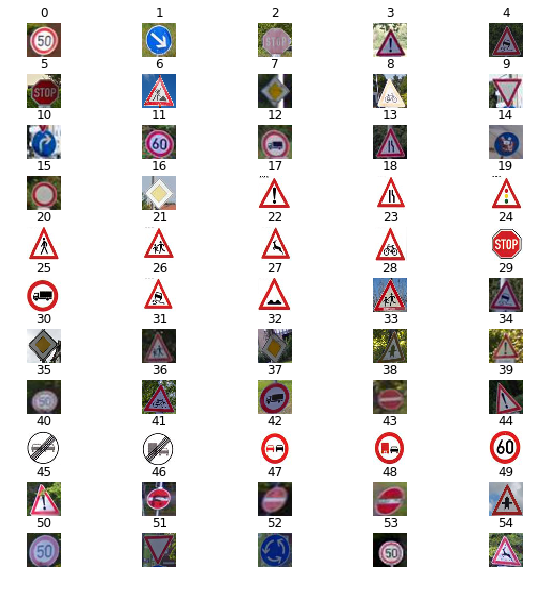

In [27]:
### Visualize all the images downloaded from the internet

fig, ax = plt.subplots(11,5,figsize=(10,10))
for i in range(len(XTestWeb)):
    ax[int(i / 5)][i % 5].imshow(XTestWeb[i])
    ax[int(i / 5)][i % 5].axis('off')
    ax[int(i / 5)][i % 5].set_title(i)
    
outputname = "./results/Webimages/all_images.png"
plt.subplots_adjust(hspace = 0.5)
plt.savefig(outputname, bbox_inches='tight', dpi=100)
plt.show()              

### Predict the Sign Type for Each Image


In [28]:
### Run the predictions here and use the model to output the prediction for each image.
### Pre-process the images
X_testWeb_norm,X_testWeb_gray = preprocess_data_list(XTestWeb, len(XTestWeb))
X_testWeb_full = np.concatenate((X_testWeb_norm,np.asarray(X_testWeb_gray)[:,:,:,None] ), axis = 3)

### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [30]:
yBars = []
xIdxs = []
with tf.Session() as sess:
    #new_saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    assert (len(X_testWeb_full)== len(yTestWeb))
    tf.get_default_graph()
    #print(act_l1.get_shape())
    for i in range (len(X_testWeb_full)):
        #print(i)
        tmp = sess.run(logits,feed_dict={x: np.reshape(X_testWeb_full[i],(1,32,32,4))})
        softMax = tf.nn.softmax(tmp)
        top5, top5Idx = tf.nn.top_k(softMax, k=5, sorted=True)
        yBar = top5.eval()
        xIdx = top5Idx.eval()
        yBars.append(yBar[0])
        xIdxs.append(xIdx[0])
        
# Not printing the softmax or the Top5 softmax values as the next code will generate graphs and pictorially print the information


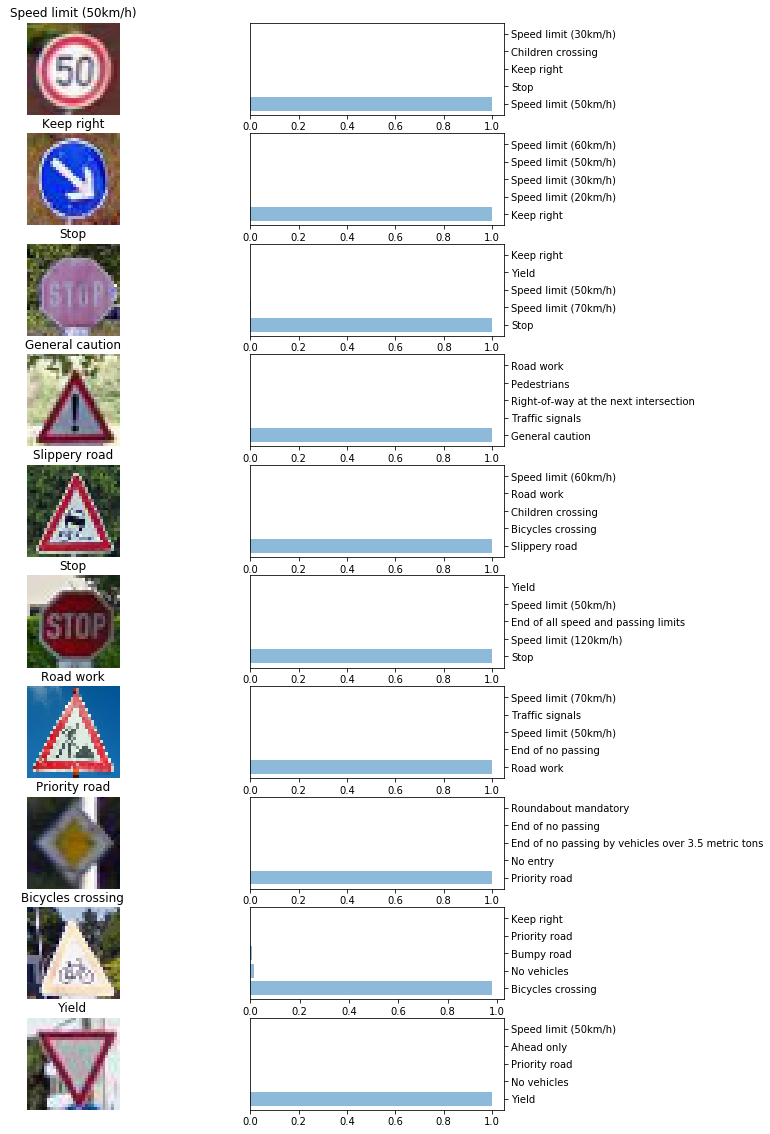

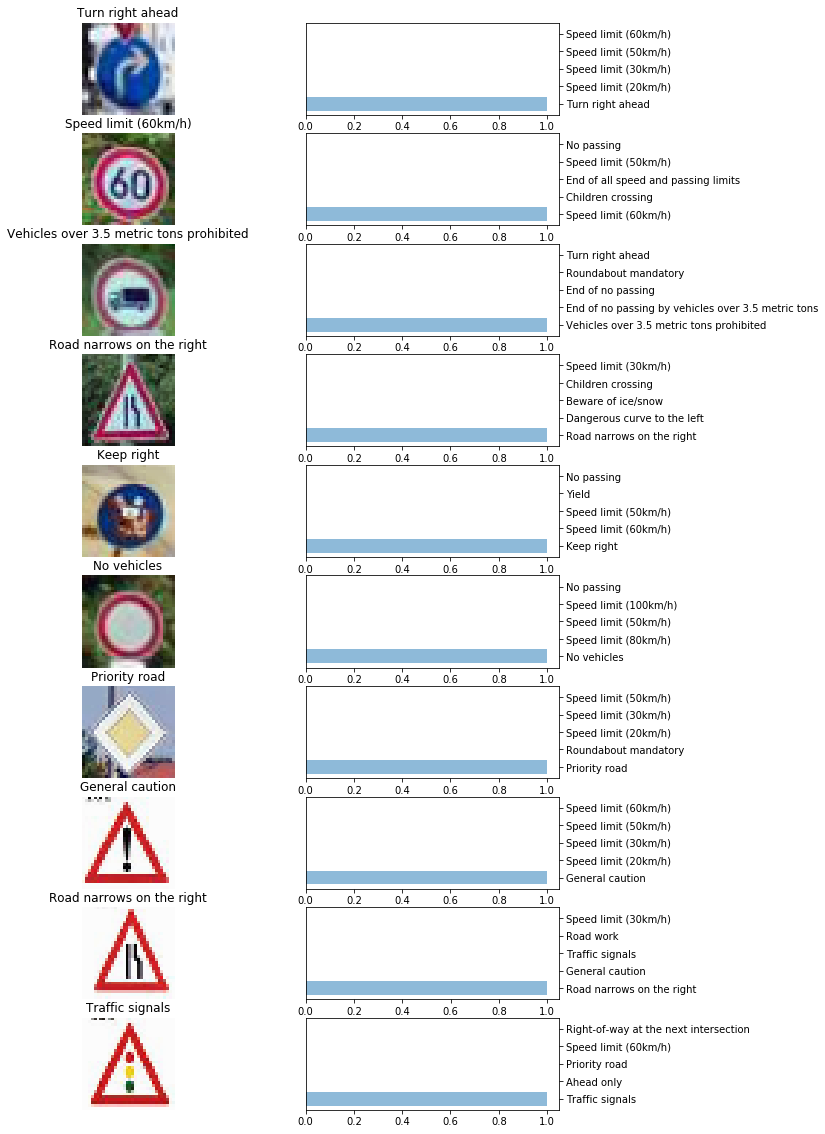

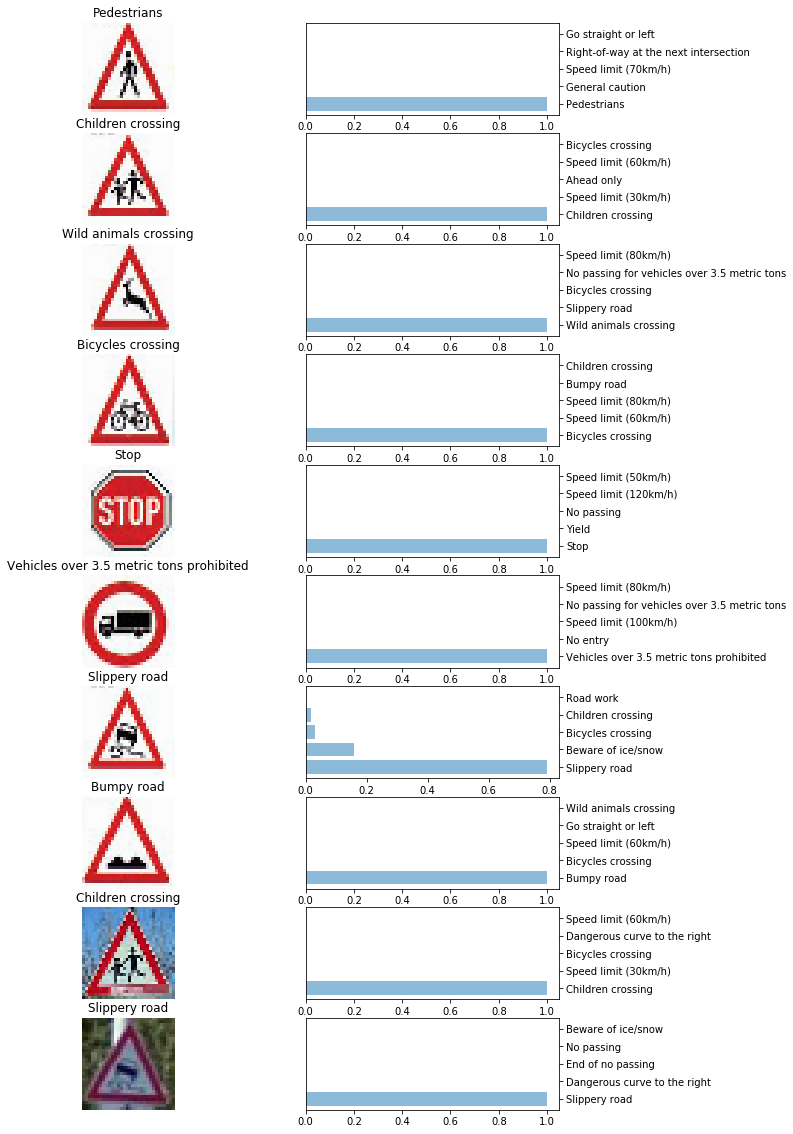

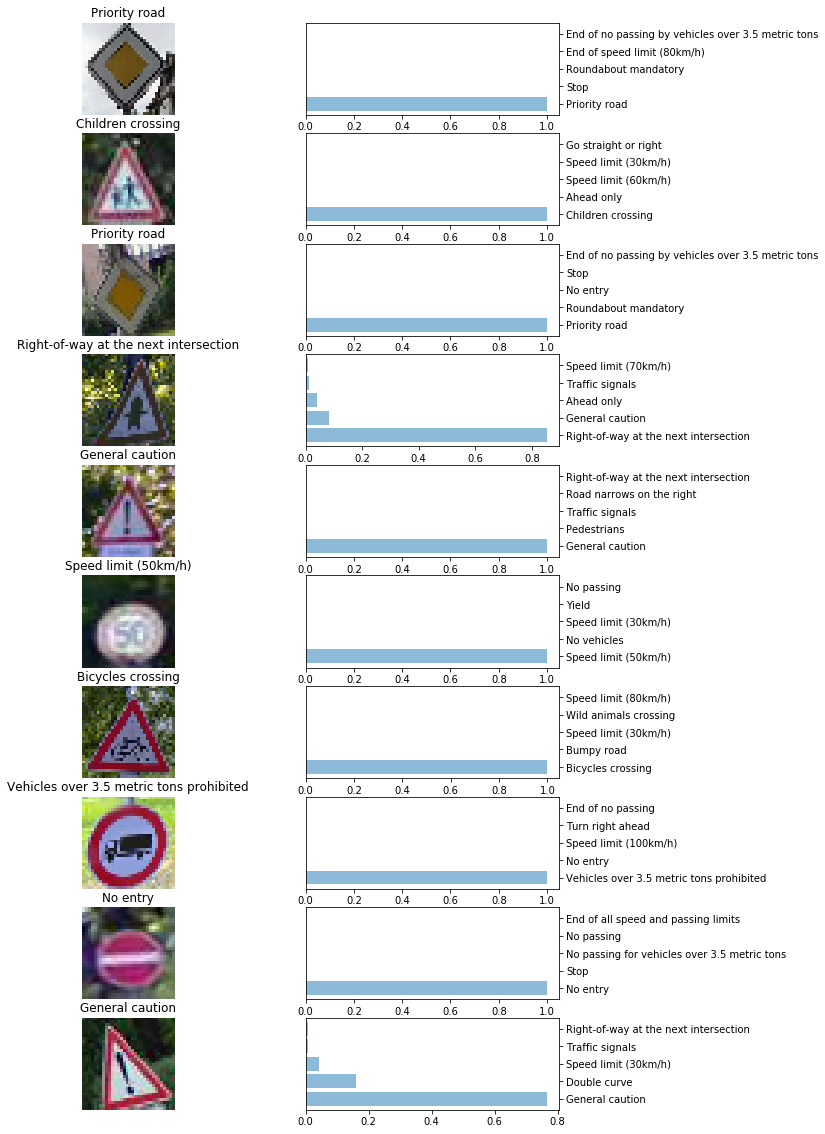

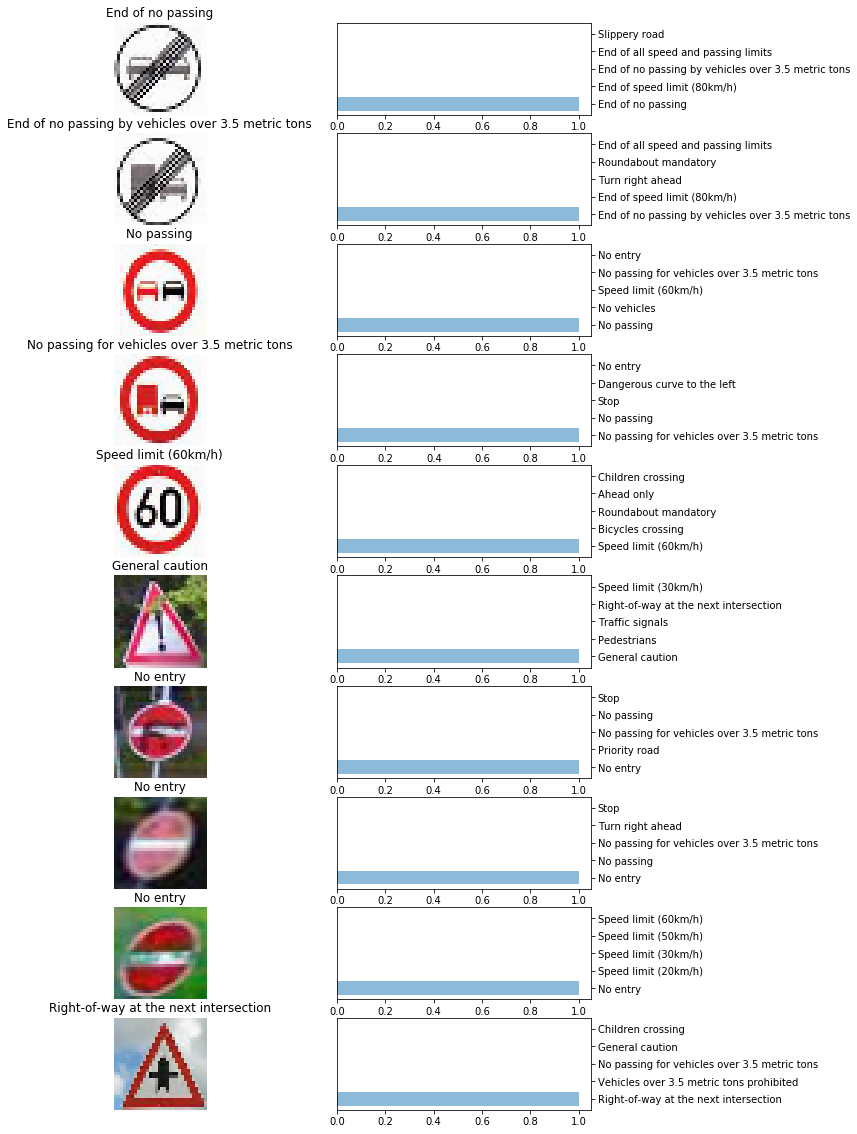

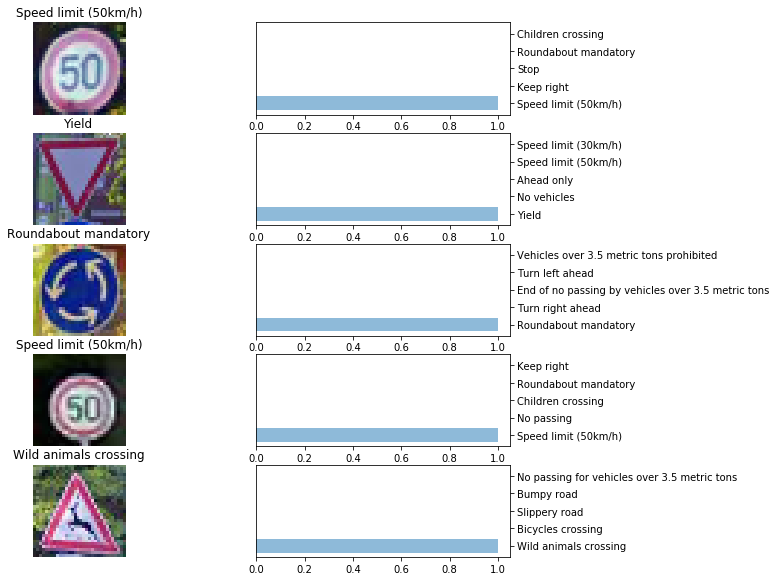

Accuracy = 100.0%
Accuracy (Top5) = 100.0%
Total pictures tested on = 55


In [34]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
### Adding the code to print Softmax Probabilities here.
correct = 0
correctTop5 = 0
total = 0
for i in range (len(X_testWeb_full)):
    xIdx = xIdxs[i]
    yBar = yBars[i]
    if xIdx[0] == yTestWeb[i]:
        correct += 1
    if yTestWeb[i] in xIdx:
        correctTop5 +=1
    total += 1
    labels_tmp = []
    for j in range(len(xIdx)):
        labels_tmp.append(labels[xIdx[j]+1])
    xTmp = np.arange(len(xIdx))
    if (np.mod(i,10)== 0):
        f = None
        f = plt.figure(i//10,figsize=(10,20))
    ax = f.add_subplot(10,2,np.mod(i,10)*2 + 1)
    ax.set_title(labels[yTestWeb[i]+1])
    plt.imshow(X_testWeb_norm[i])
    plt.axis('off')
    ax = f.add_subplot(10,2,np.mod(i,10)*2 + 2)
    plt.barh(xTmp, yBar, align='center', alpha=0.5)
    plt.yticks(xTmp, labels_tmp)
    ax.yaxis.tick_right()
    if(np.mod(i,10)==9):
        outputname = "./results/Webimages/webimage_results"+str(i//10)+".png"
        plt.savefig(outputname, bbox_inches='tight', dpi=300)
        plt.show()
outputname = "./results/Webimages/webimage_results"+str((i//10)+1)+".png"
plt.savefig(outputname, bbox_inches='tight', dpi=300)
plt.show()

    
print("Accuracy = " + str(correct/total*100) + "%")
print("Accuracy (Top5) = " + str(correct/total*100) + "%")
print("Total pictures tested on = " + str(total))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template]\(https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [35]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

# modified to plot multiple fully connected output layers of the CNN
# Each fully connected layer received in the input list will be plotted in an individual subplot

def outputFeatureMap(image_input, tf_activation, outputname, activation_min=-1, activation_max=-1 ,plt_num=1, linear_flag = False):
    # Expects image_input to be pre-processed
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    if linear_flag == True:
        activation_list = []
        for idx in range(len(tf_activation)):
            activation_list.append(tf_activation[idx].eval(session=sess,feed_dict={x : image_input}))
        f = plt.figure(figsize= (10,14))
        colorOffset = float(103./255.)
        for i in range(len(activation_list)):
            #color = np.zeros([3],dtype = 'float')
            #color[np.mod(i,3)]=colorOffset
            #colorOffset += 47
            if colorOffset>255:
                colorOffset -= float(173./255.)
            f.add_subplot(len(activation_list),1,i+1)
            #print(activation_list[i][0])
            plt.plot(activation_list[i][0],label = activation_list[i])
            plt.title(tf_activation[i])
            plt.grid('on')
            if i == len(activation_list)-1:
                plt.xticks(np.arange(0, 43, 1.0))
        #f.subplots_adjust(wspace=1.0)
        
            
    else:
        activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
        featuremaps = activation.shape[3]
        print(np.shape(activation))
        plt.figure(plt_num, figsize=(20,20))
        for featuremap in range(featuremaps):
            #activation_min = np.min(activation[:,:,:,featuremap])
            #activation_max = np.max(activation[:,:,:,featuremap])
            plt.subplot(8,8, featuremap+1) # sets the number of feature maps to show on each row and column
            plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
            if activation_min != -1 & activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
            elif activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
            elif activation_min !=-1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
            else:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            plt.axis('off')
    
    plt.savefig(outputname, bbox_inches='tight', dpi=200)
    plt.show()

(1, 30, 30, 36)


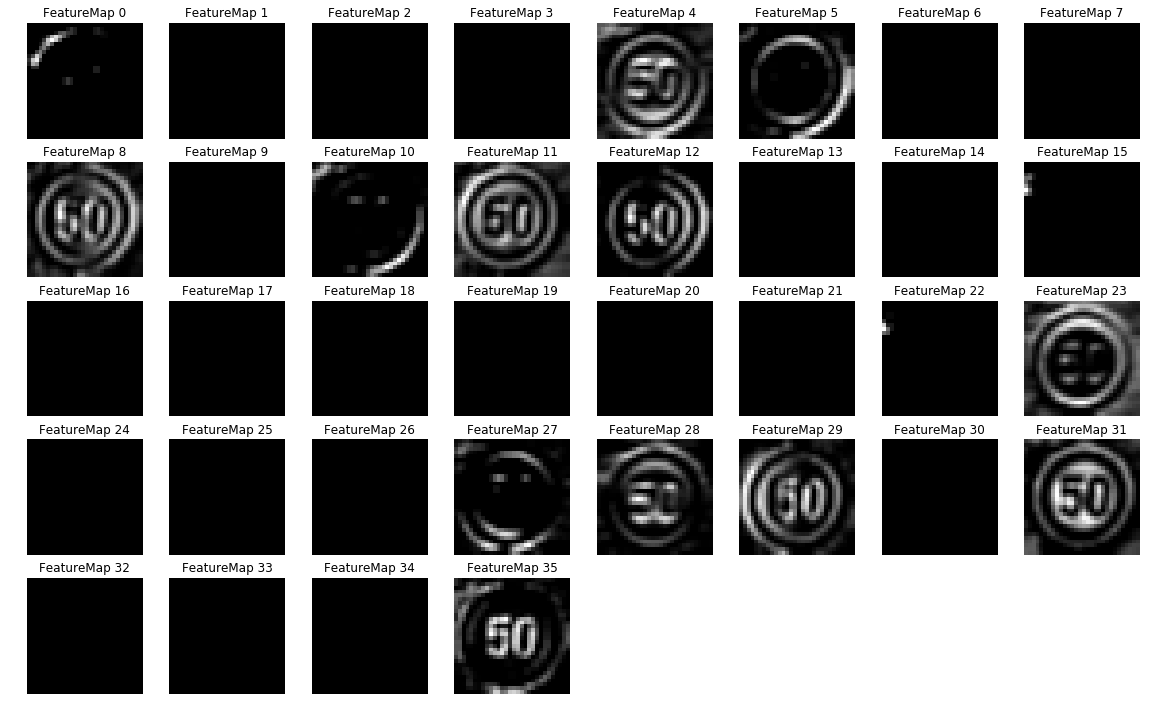

(1, 14, 14, 64)


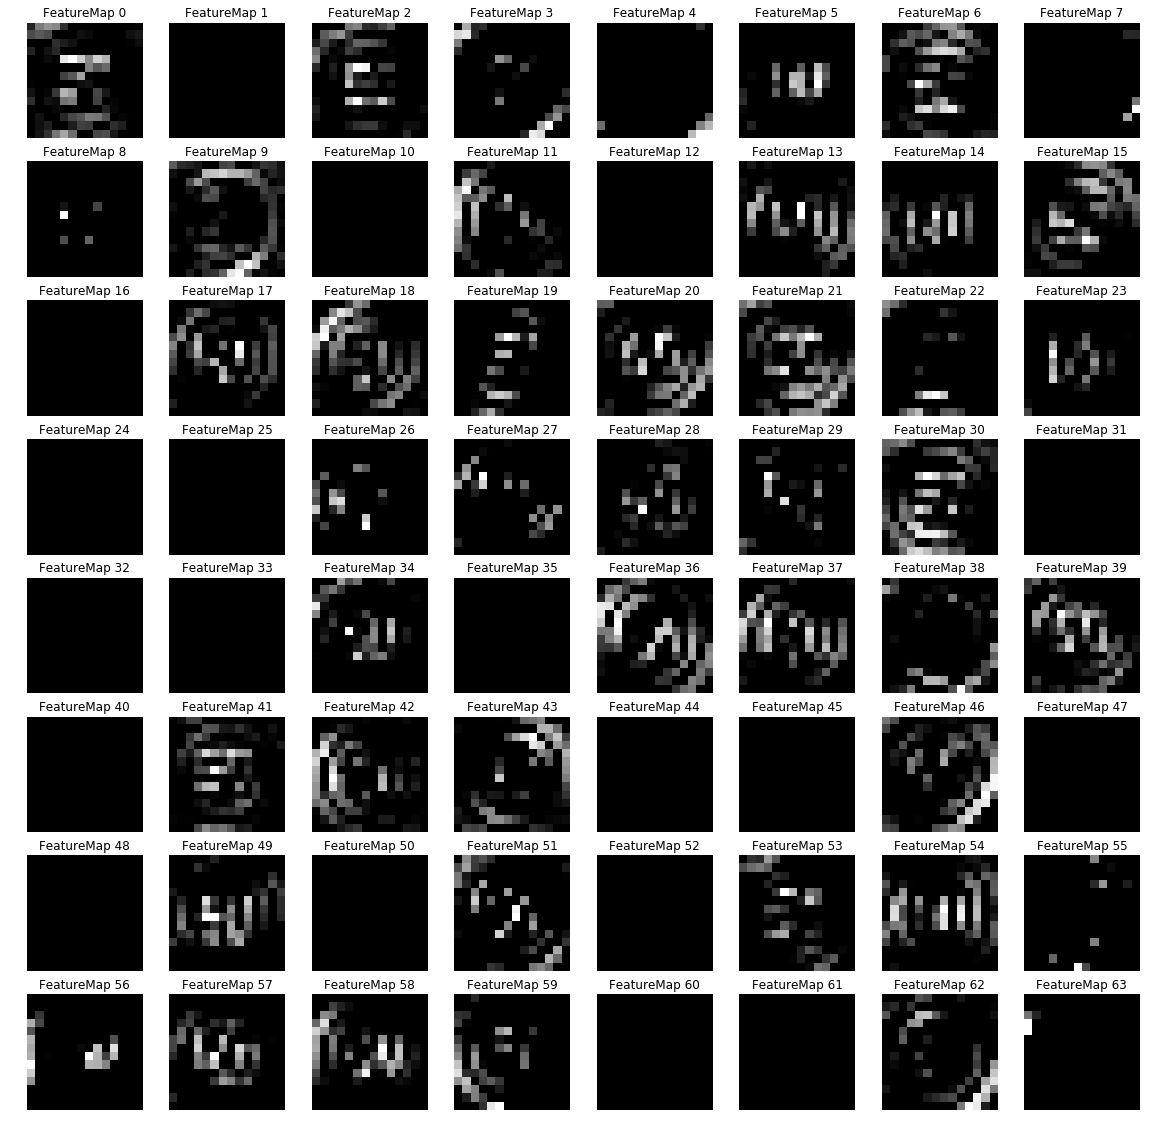

(1, 5, 5, 64)


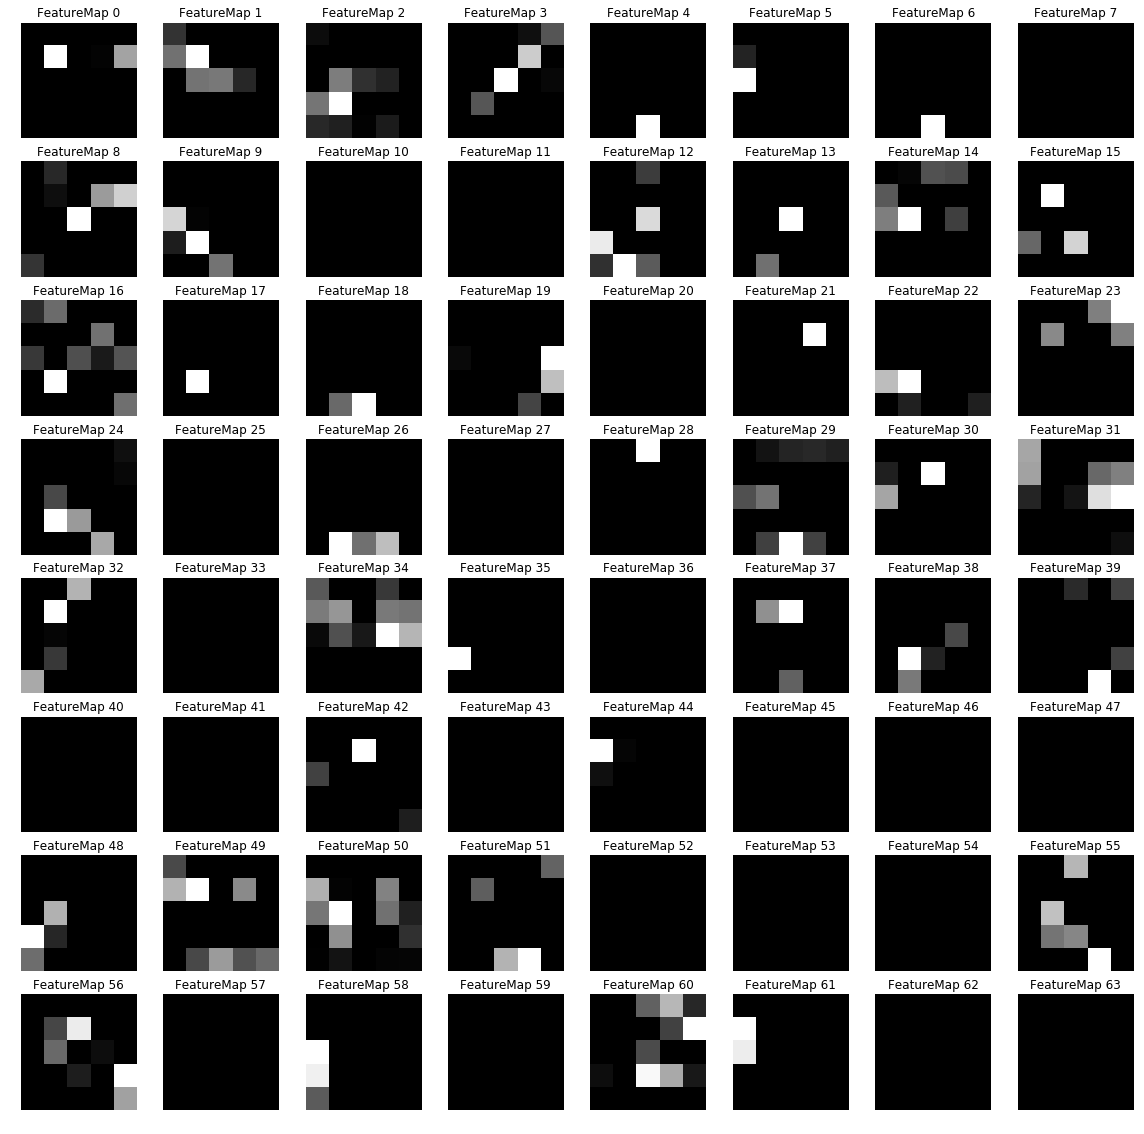

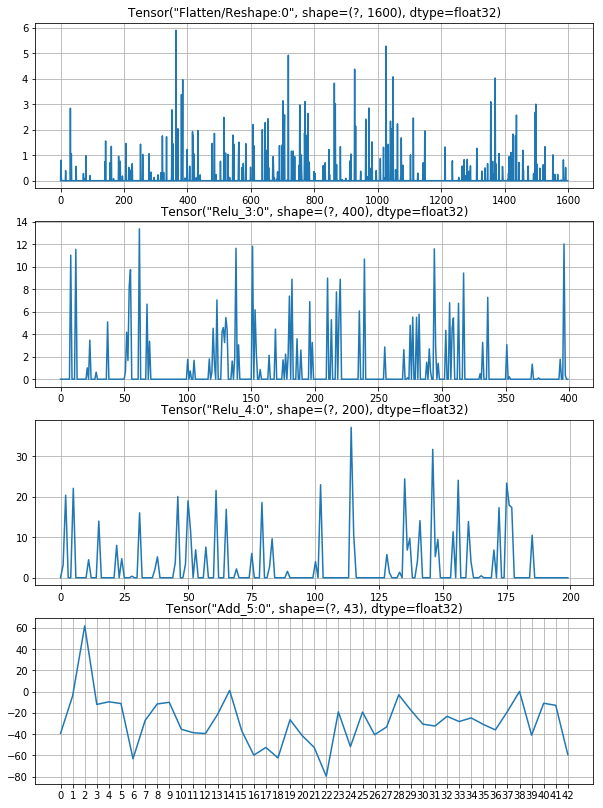

(1, 30, 30, 36)


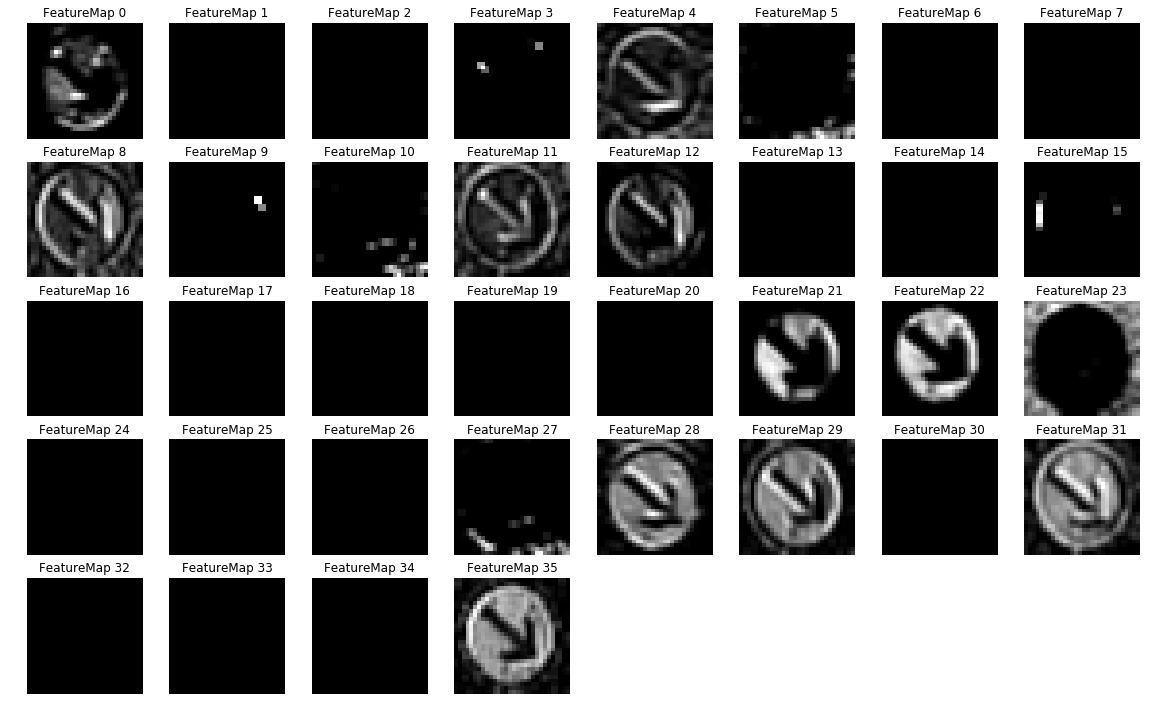

(1, 14, 14, 64)


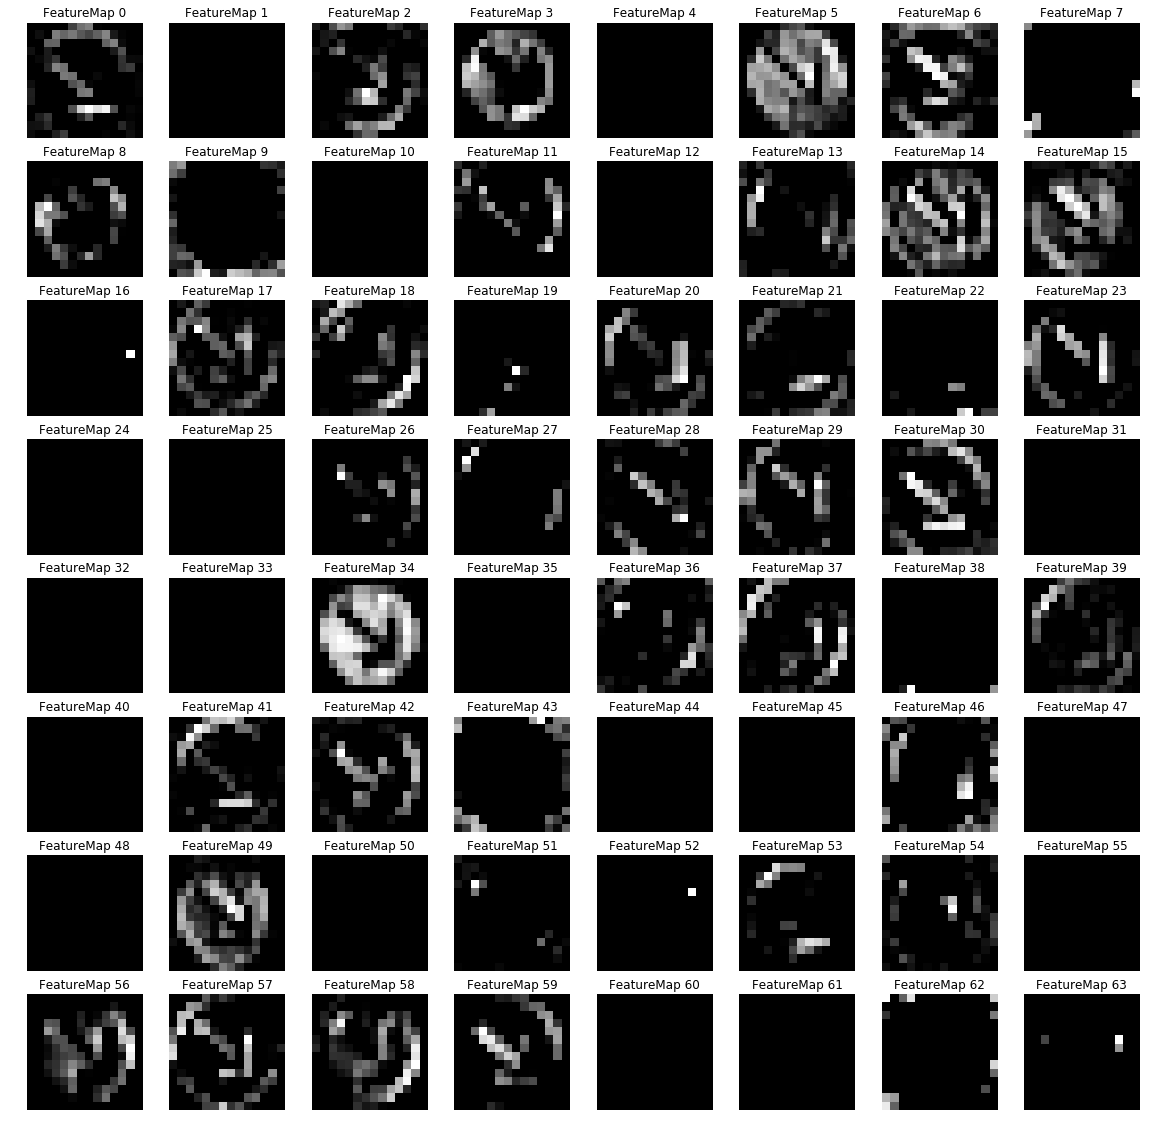

(1, 5, 5, 64)


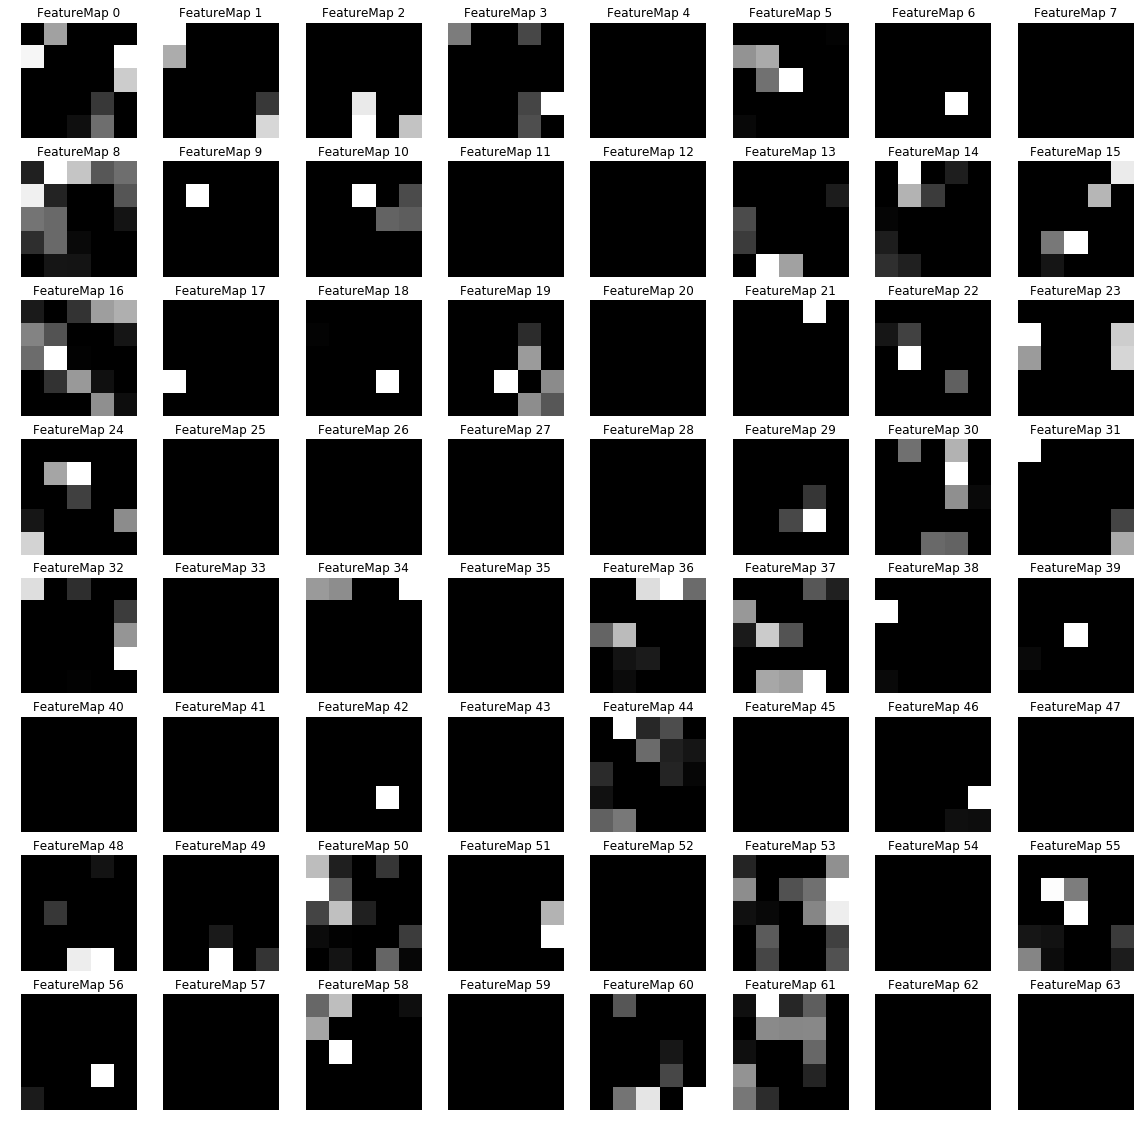

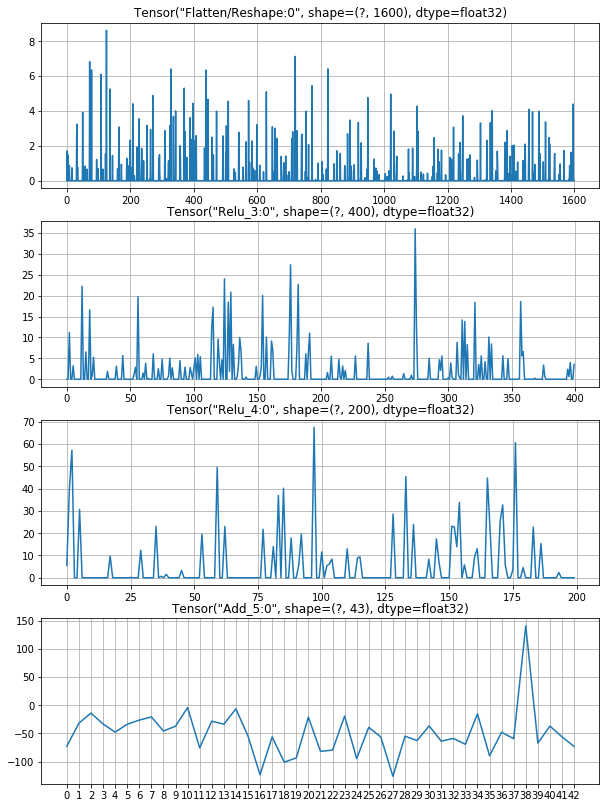

(1, 30, 30, 36)


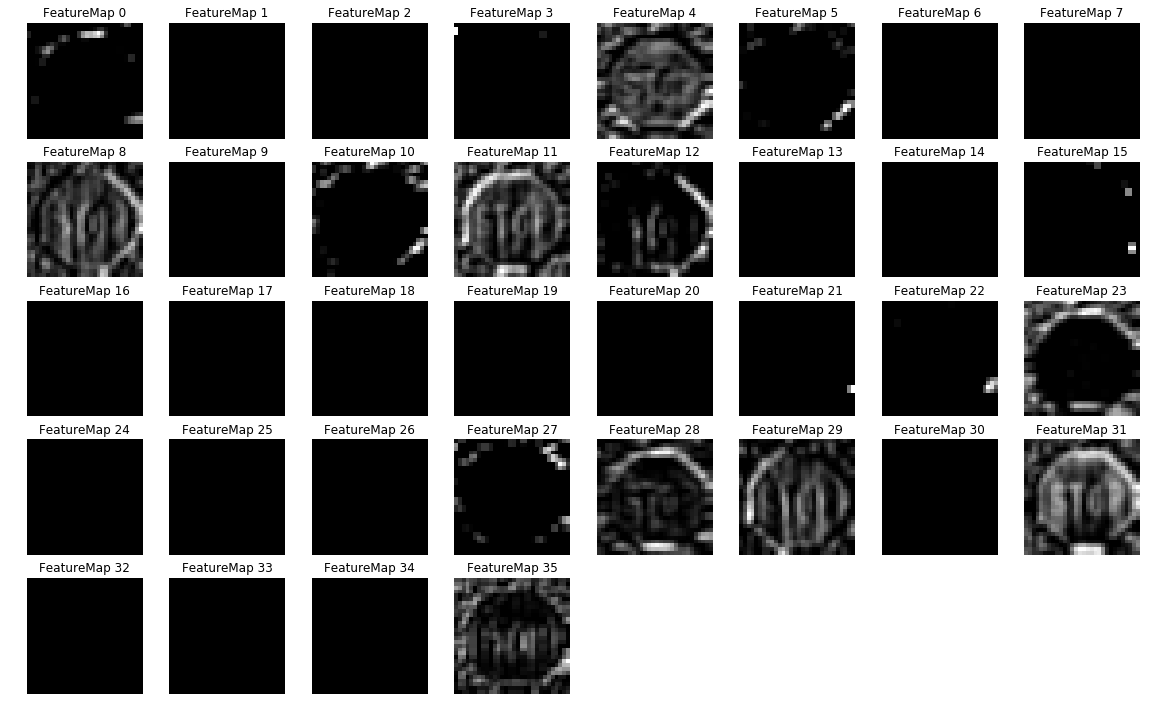

(1, 14, 14, 64)


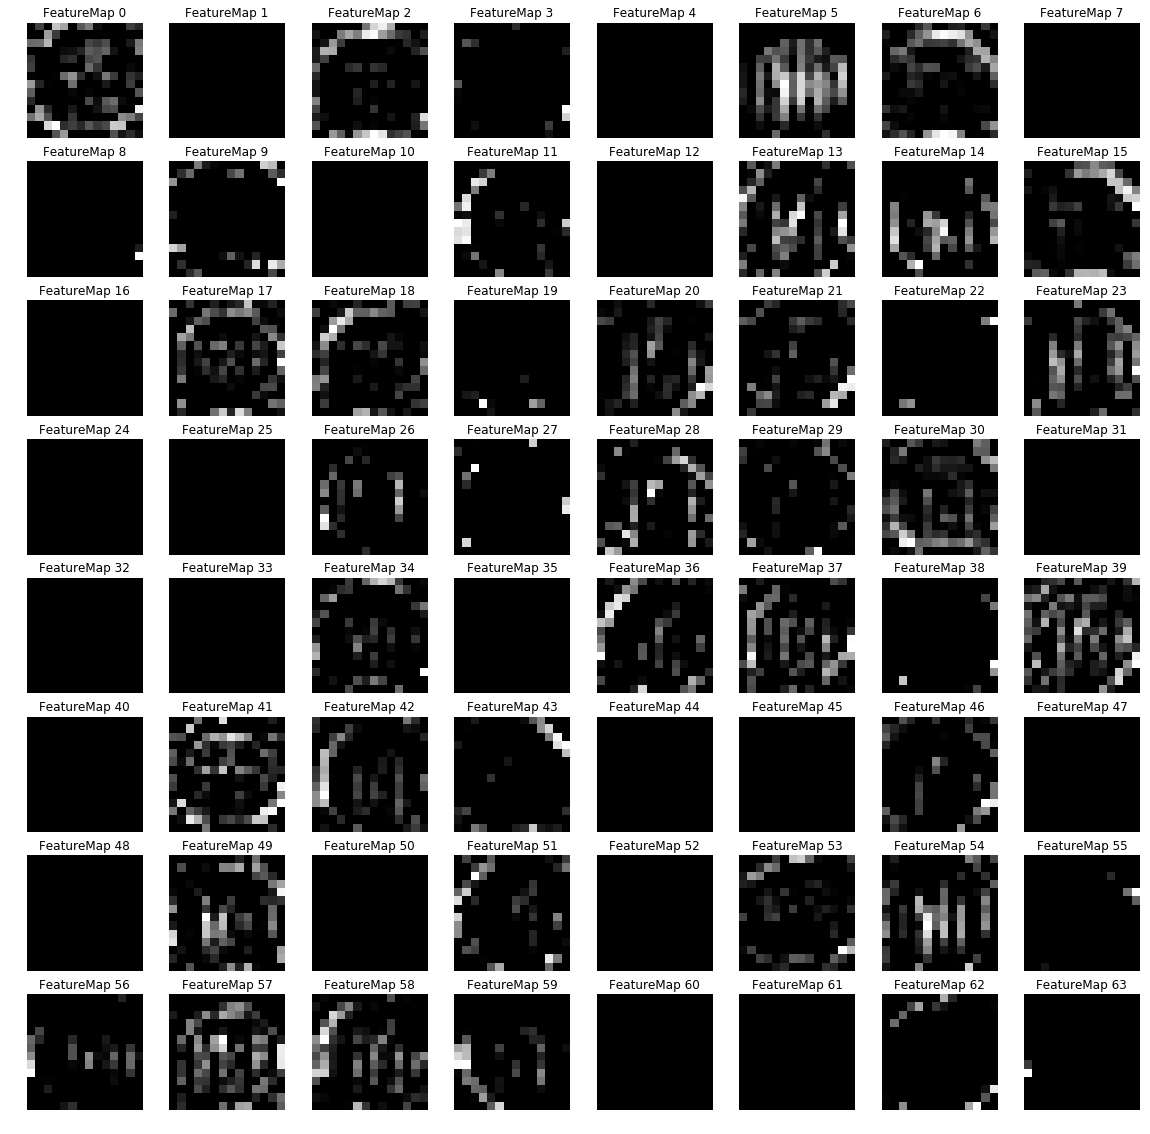

(1, 5, 5, 64)


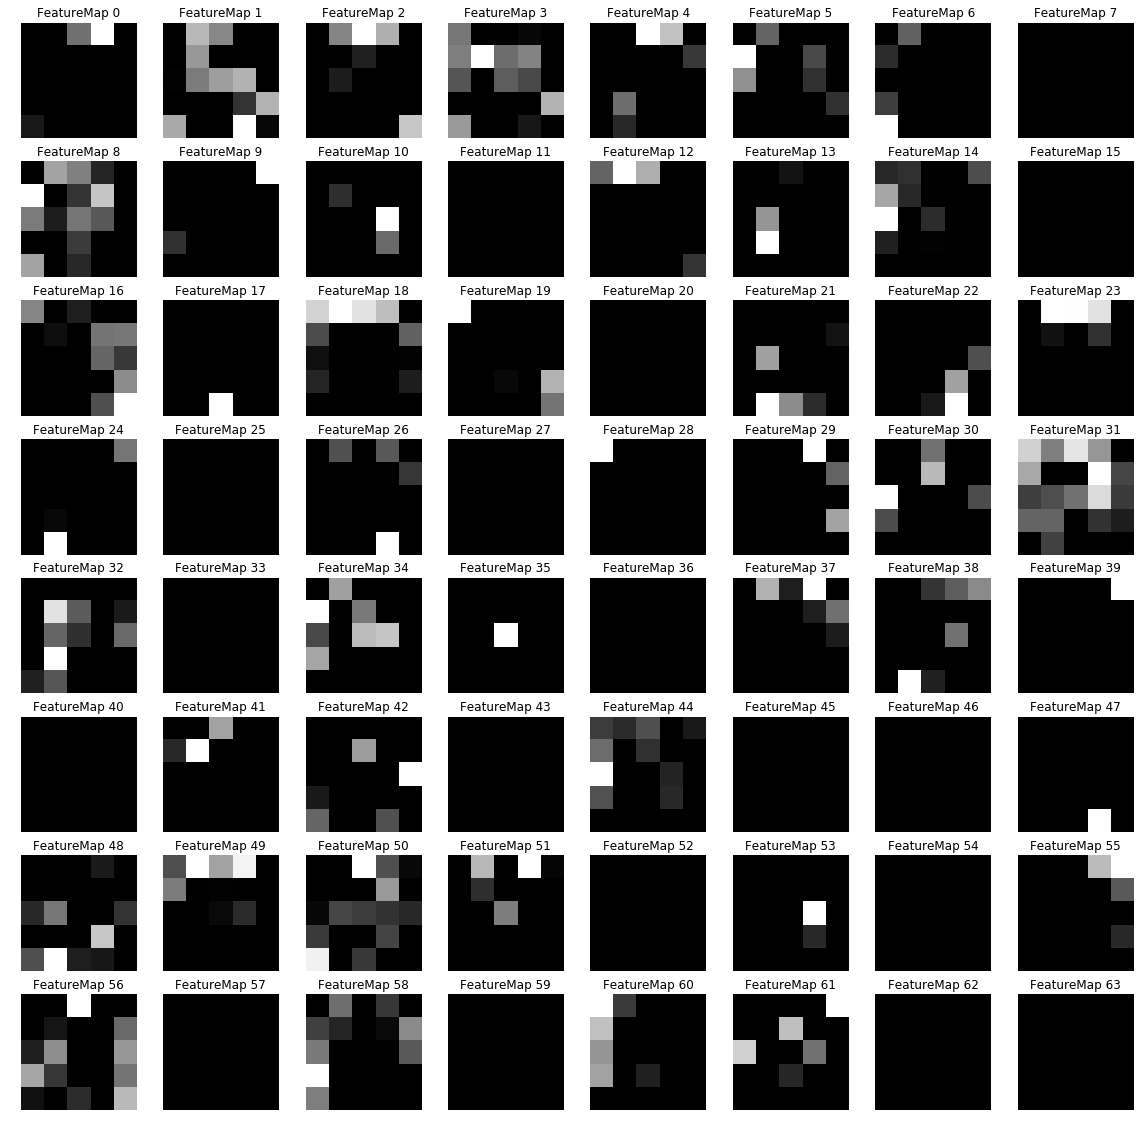

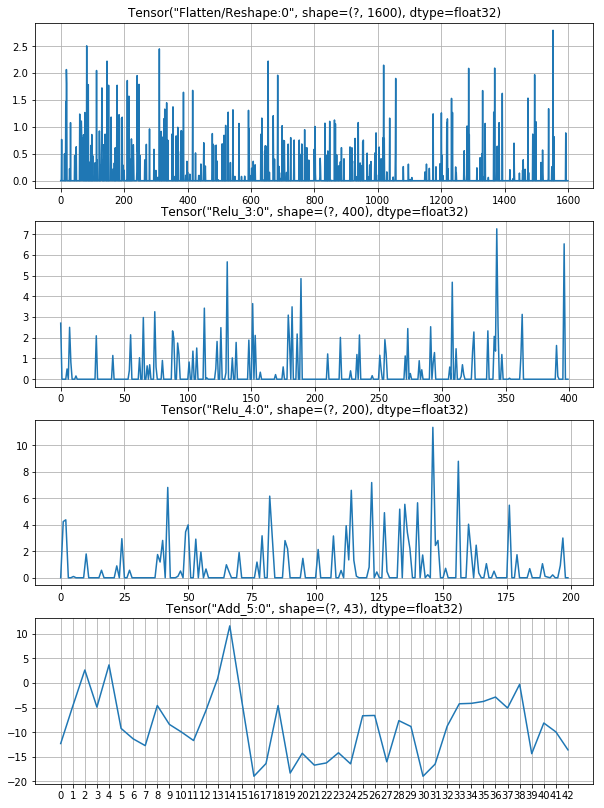

(1, 30, 30, 36)


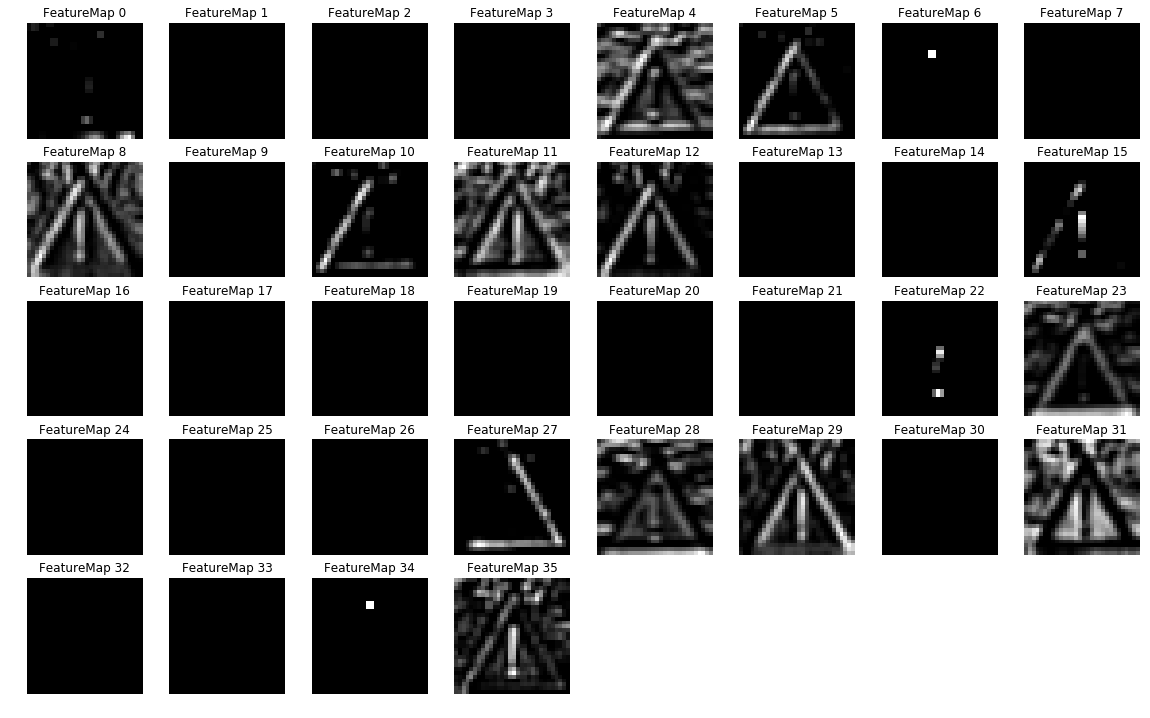

(1, 14, 14, 64)


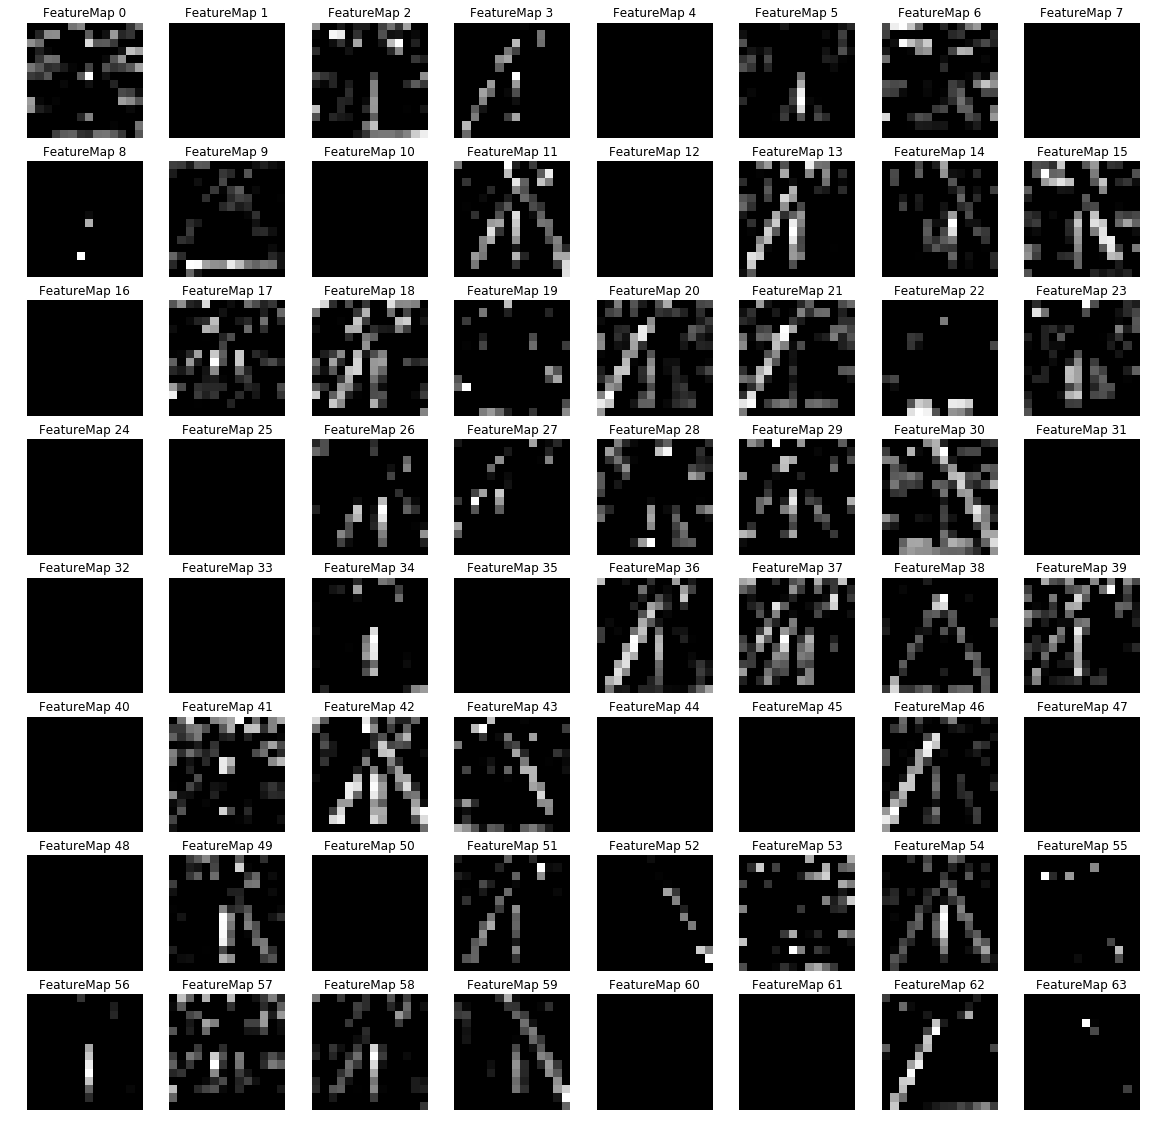

(1, 5, 5, 64)


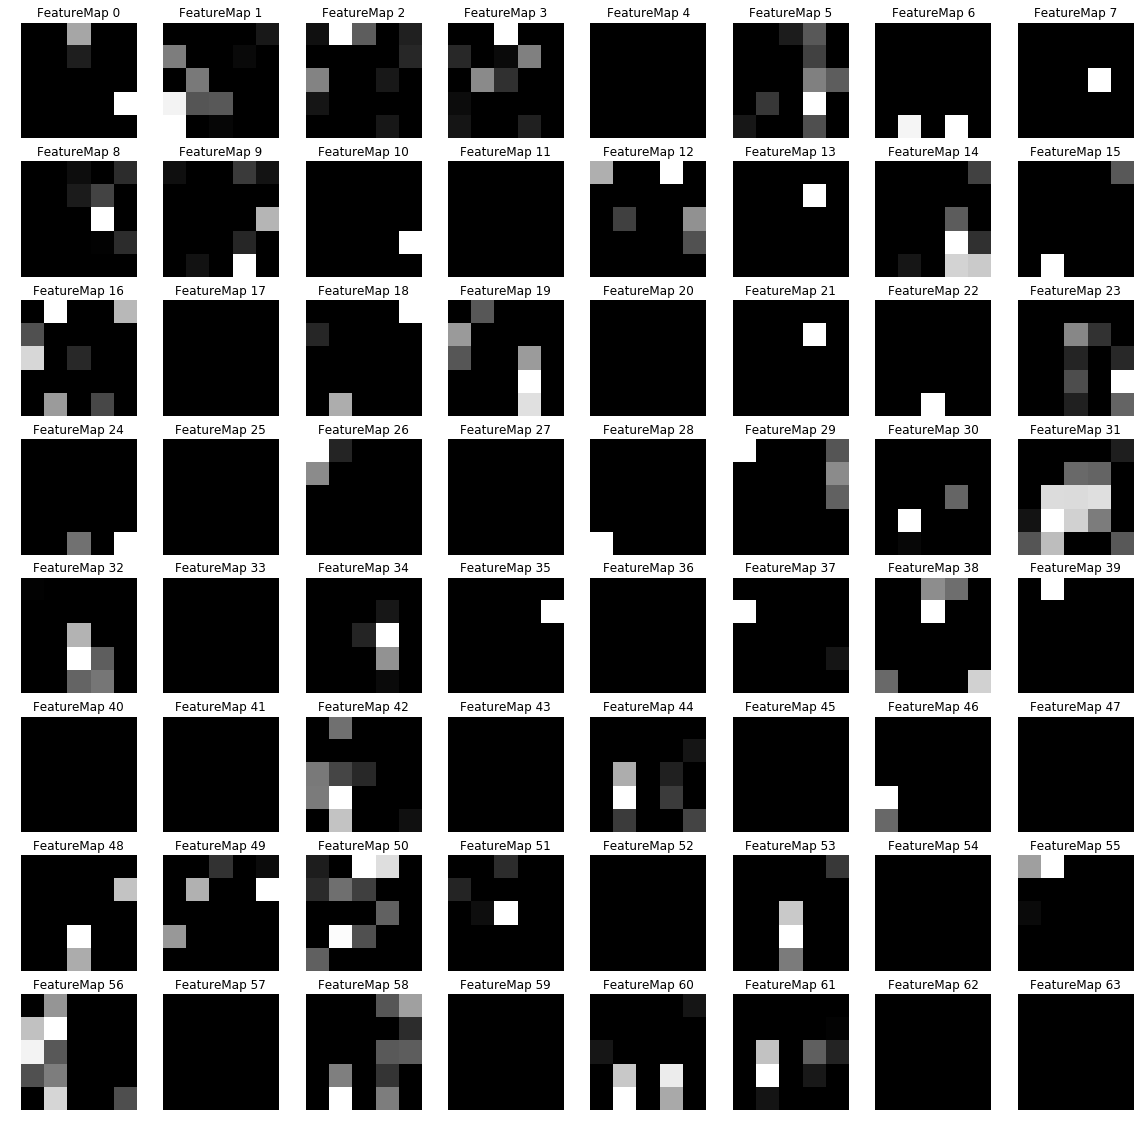

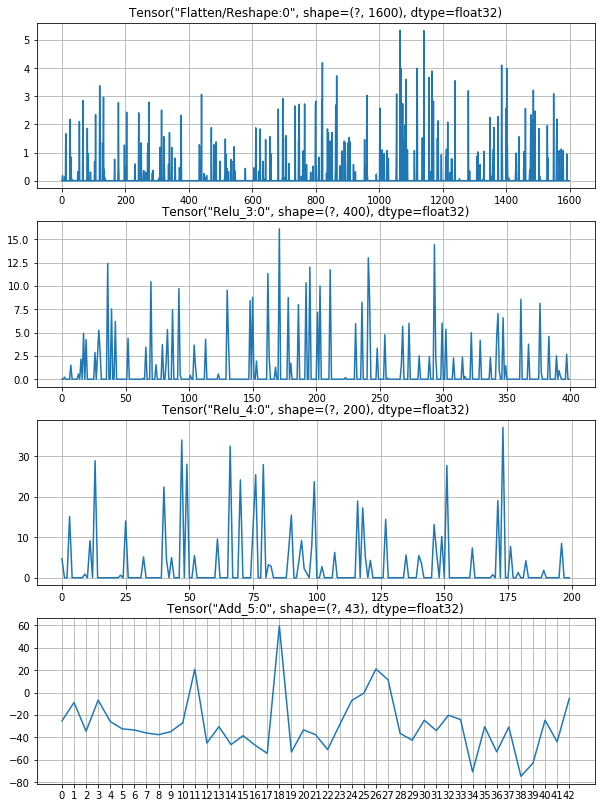

(1, 30, 30, 36)


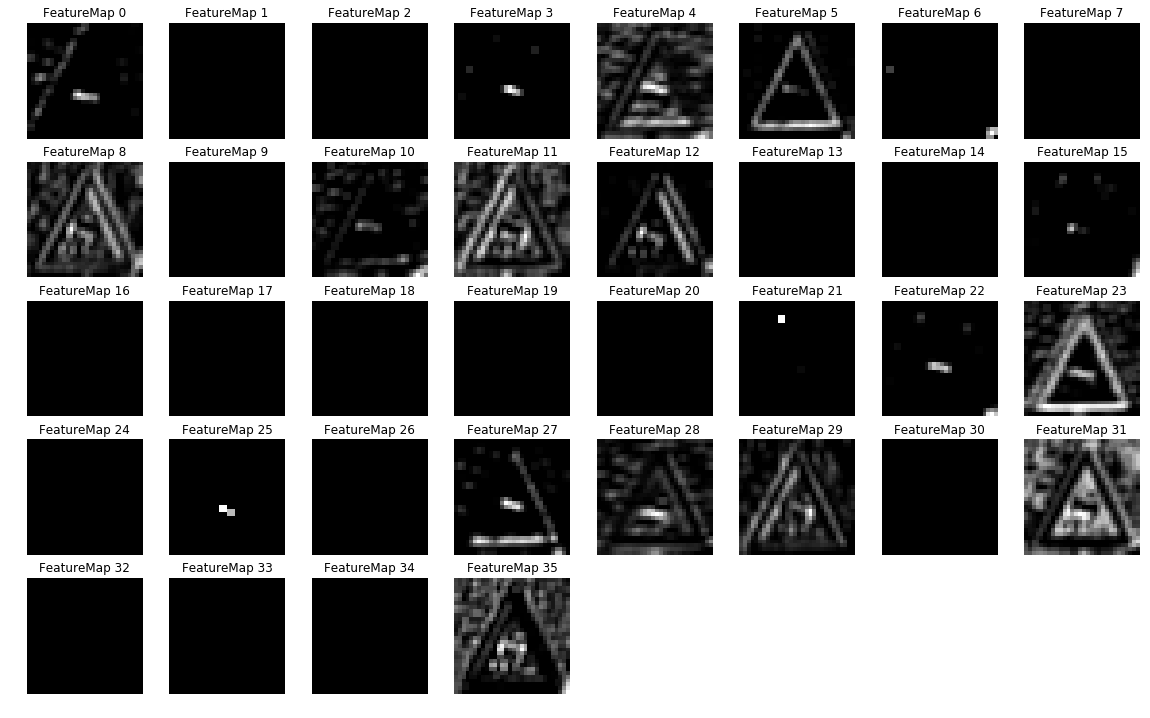

(1, 14, 14, 64)


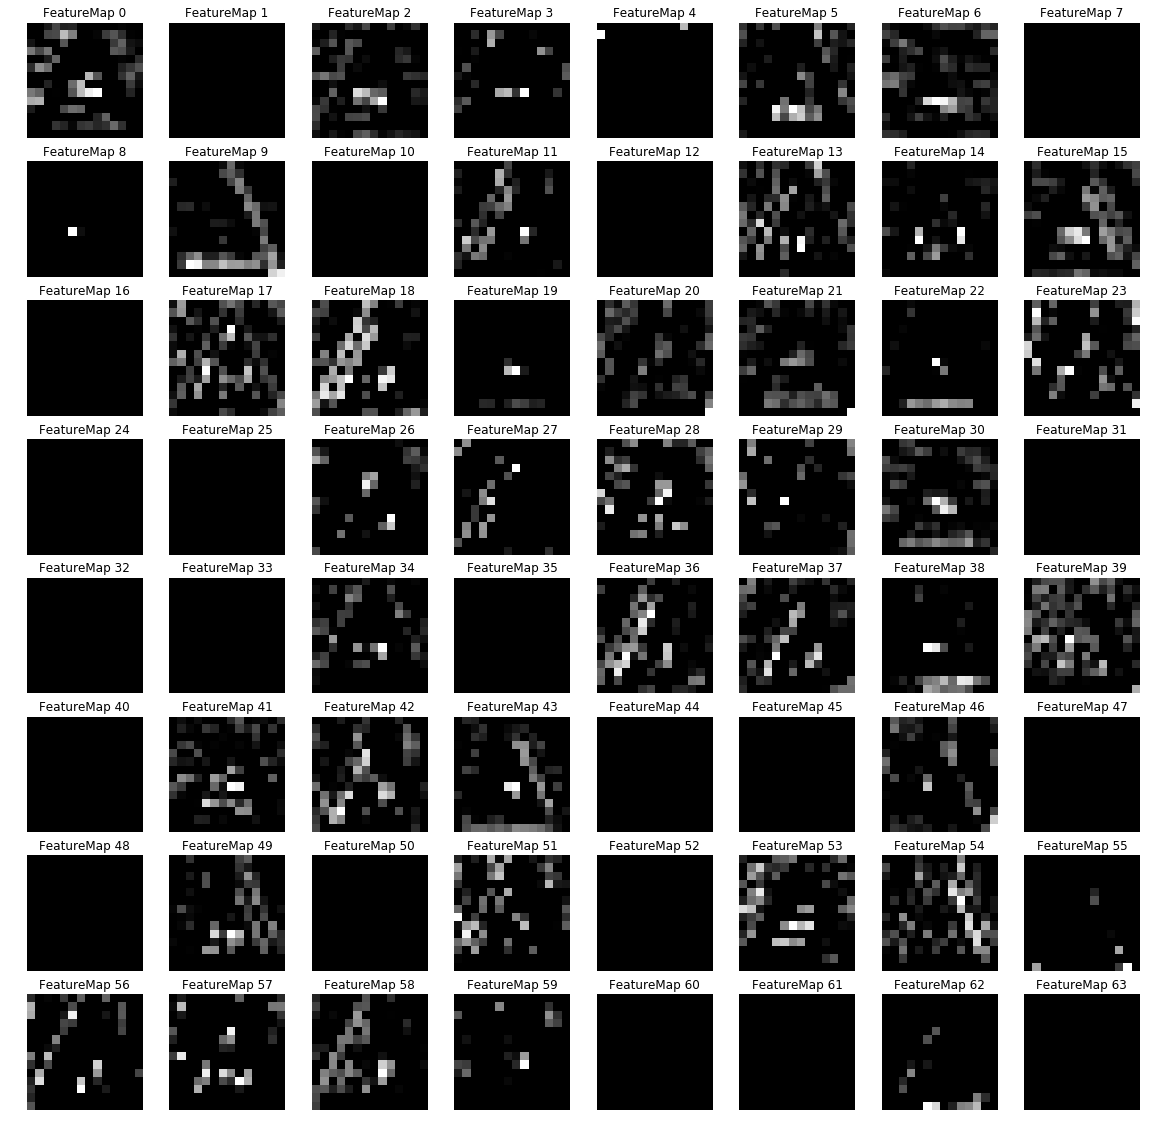

(1, 5, 5, 64)


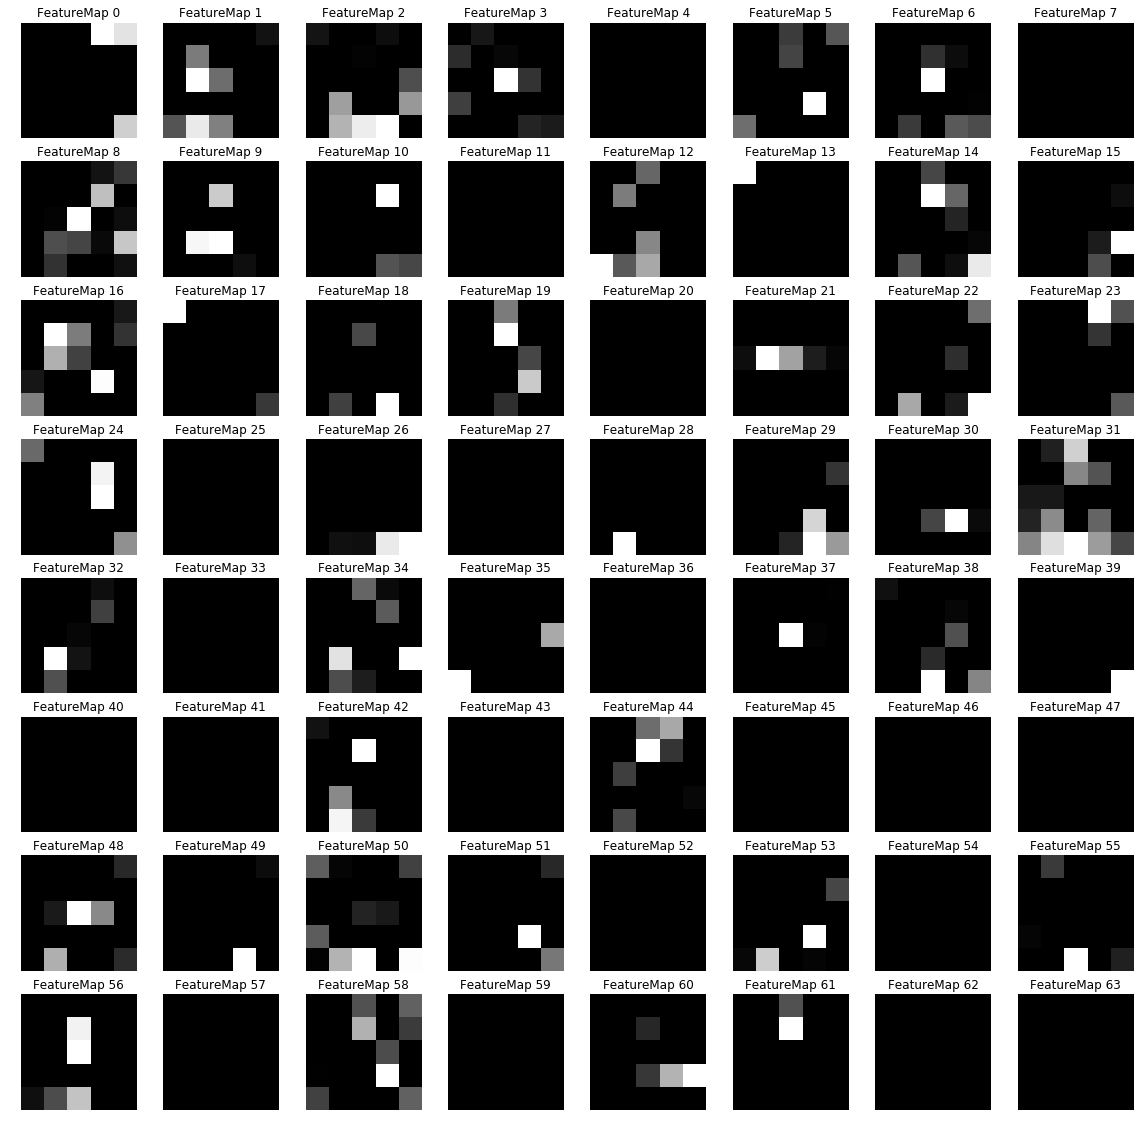

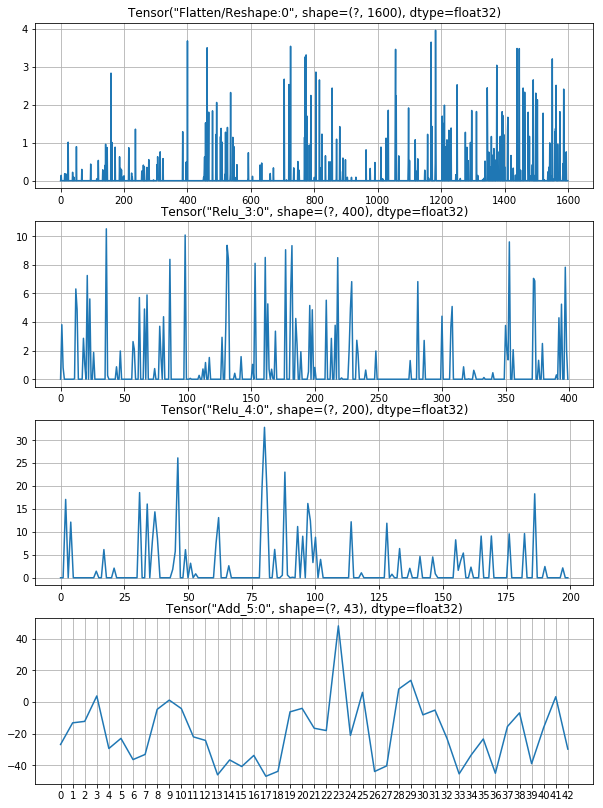

(1, 30, 30, 36)


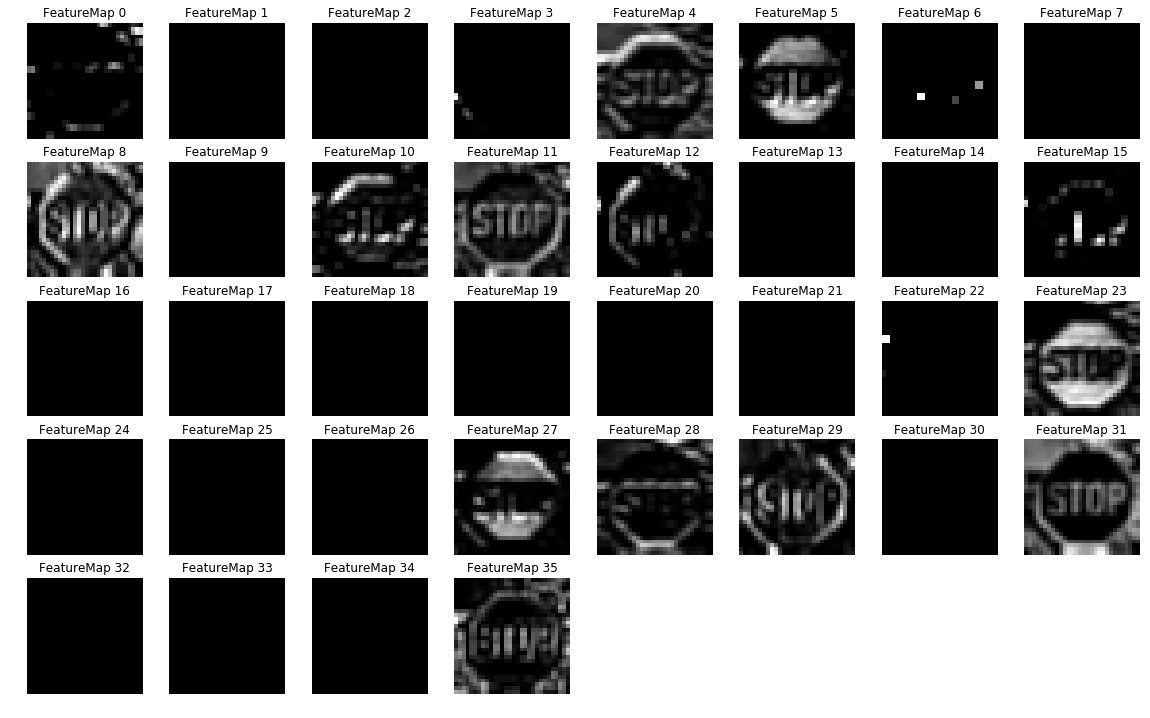

(1, 14, 14, 64)


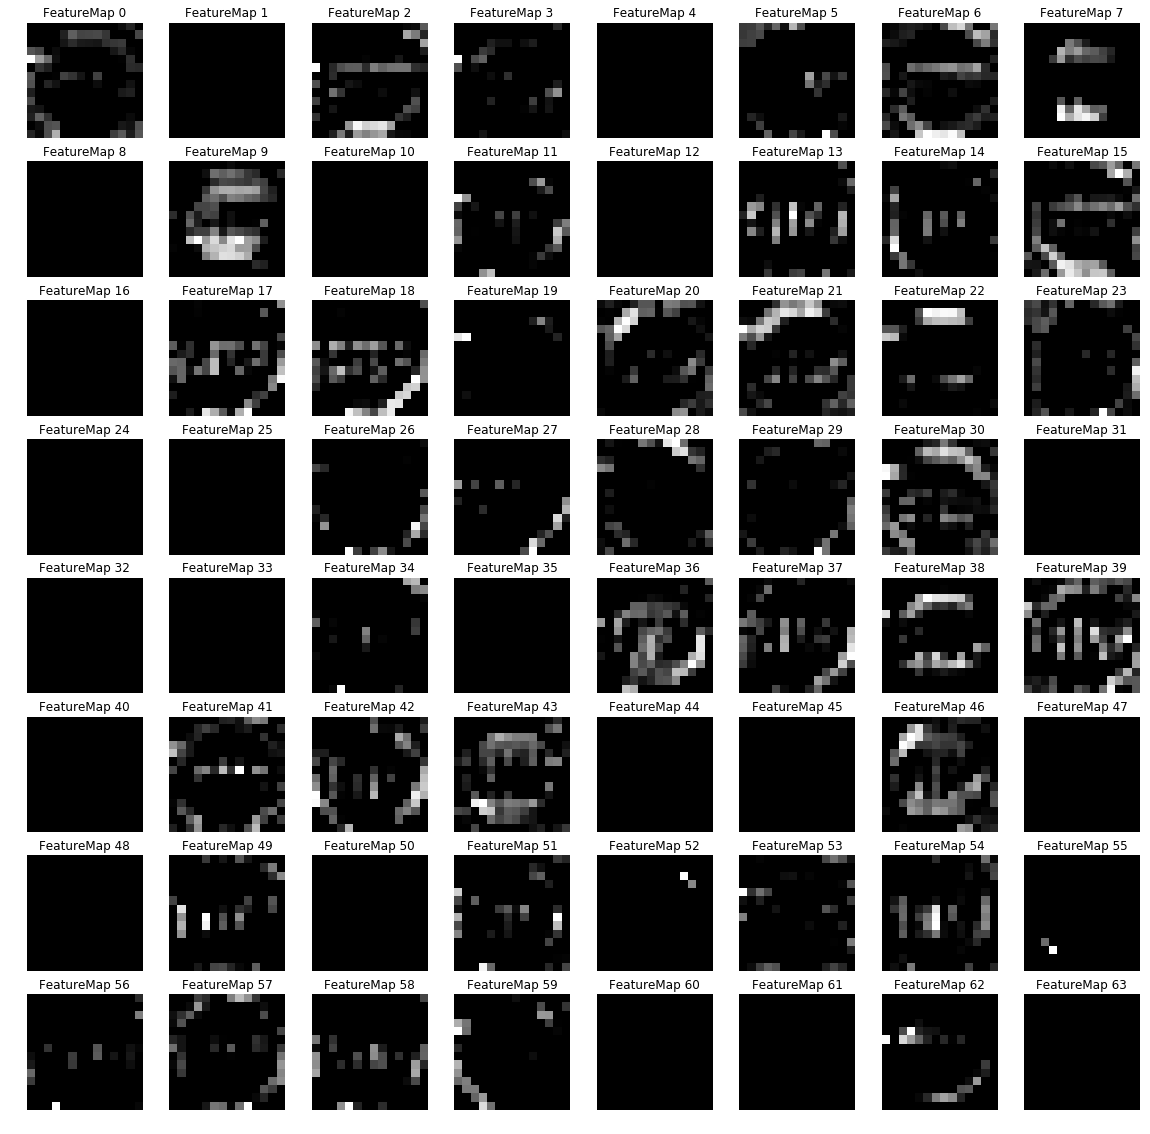

(1, 5, 5, 64)


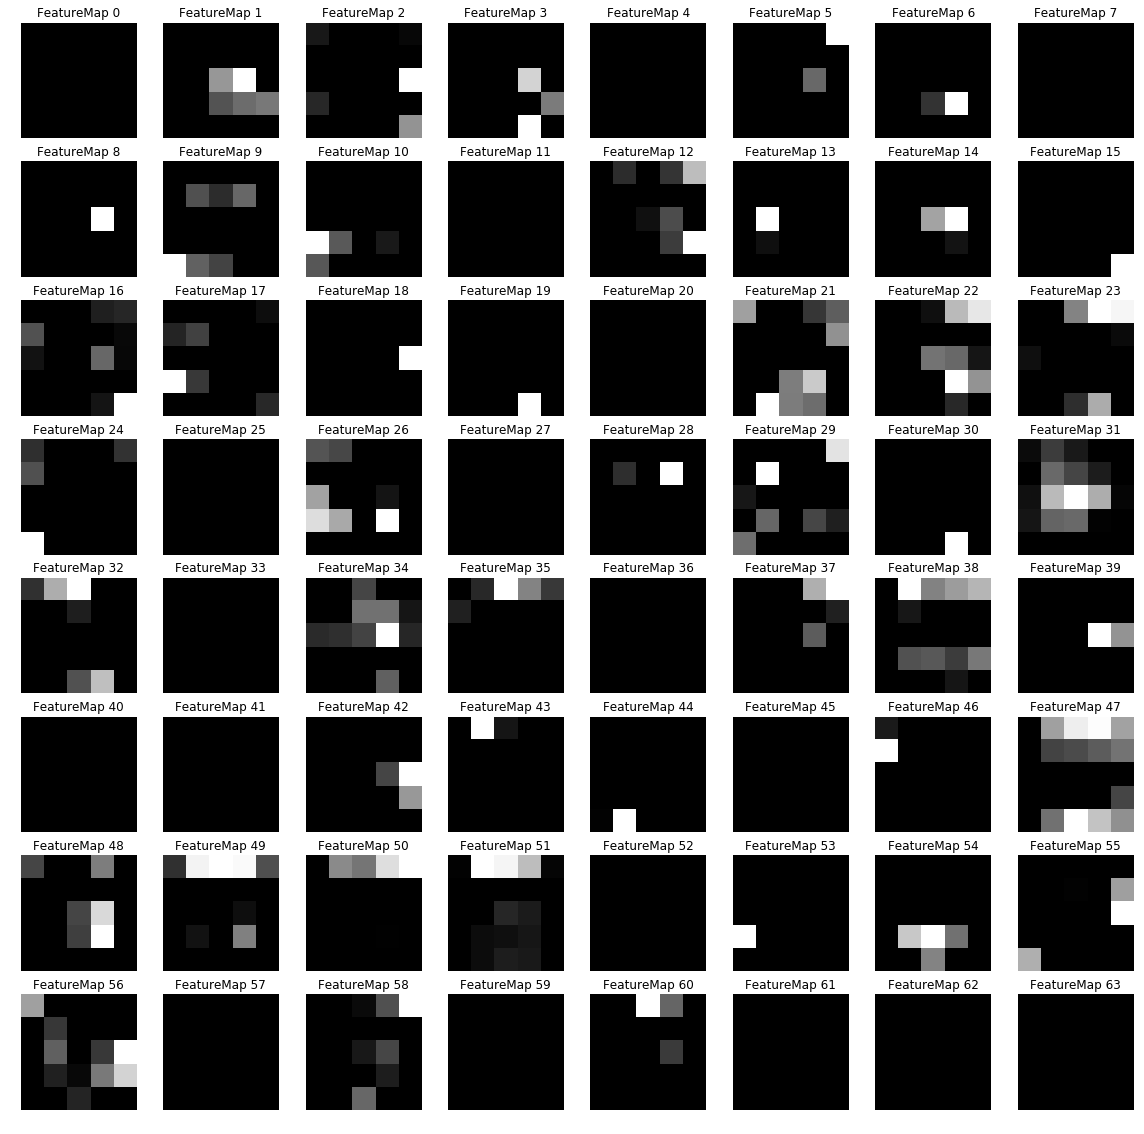

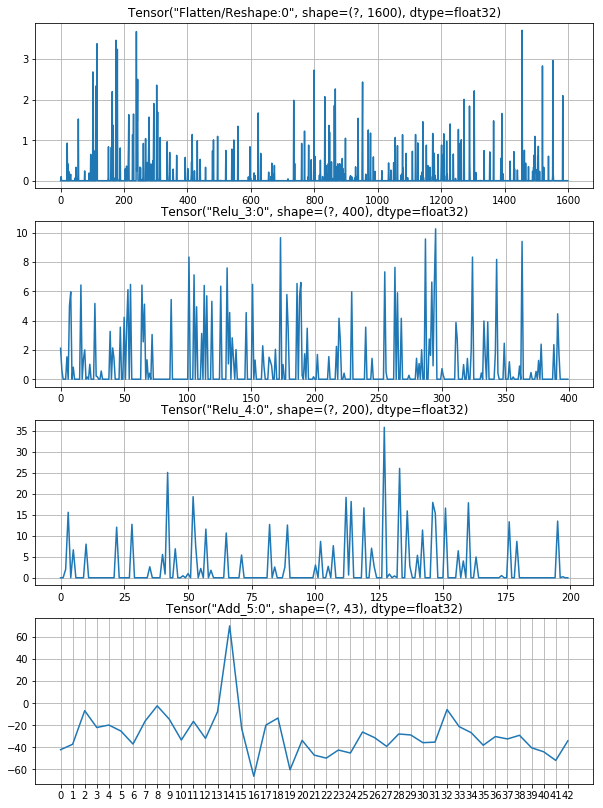

In [36]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #print([n.name for n in tf.get_default_graph().as_graph_def().node])
    """
    #f_l1 = sess.run(tf.get_default_graph().get_tensor_by_name('lenet/filter_l1:0'))
    #print(np.shape(f_l1))
    """
    #print(tmp)
    #print(yTestWeb[2])
    root = "./results/view_activations/webimage_dwnsample_"
    #for i in range(len(X_testWeb_full)):
    for i in range(0,6):
        outputFeatureMap(np.reshape(X_testWeb_full[i],(1,32,32,4)), pool_l1,root+str(i)+"_pool_l1_new.png", activation_min=-1, activation_max=-1 ,plt_num= i*4+1)
        outputFeatureMap(np.reshape(X_testWeb_full[i],(1,32,32,4)), pool_l2,root+str(i)+"_pool_l2_new.png", activation_min=-1, activation_max=-1 ,plt_num= i*4+2)
        outputFeatureMap(np.reshape(X_testWeb_full[i],(1,32,32,4)), pool_l3,root+str(i)+"_pool_l3_new.png", activation_min=-1, activation_max=-1 ,plt_num= i*4+3)
        outputFeatureMap(np.reshape(X_testWeb_full[i],(1,32,32,4)), [flattened,act_linear1,act_linear2,logits],root+str(i)+"_fully_connected_layers.png", activation_min=-1, activation_max=-1 ,plt_num= i*4+4,linear_flag = True)
    #plt.show()

In [ ]:
### Test network on the provided test image set and also calcualte performance on the training set.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_full, y_test)
    train_accuracy = evaluate(X_train_full, y_train)
    valid_accuracy = evaluate(X_valid_full, y_valid)
    

In [41]:
print("Accuracy for training set = " + str(train_accuracy))
print("Accuracy for validation set = " + str(valid_accuracy))
print("Accuracy for test set = " + str(test_accuracy))

Accuracy for training set = 1.0
Accuracy for validation set = 0.981405895962
Accuracy for test set = 0.967695961844
